<a href="https://colab.research.google.com/github/Arun5uresh/Latest-News-Classifier/blob/master/KeyFM_Data_Analysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Data Analysis Exercise**
Arun Suresh

### Combing all the files

In [89]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

start1=time.time()


In [90]:
import  pandas as pd
import time
import glob

start=time.time()
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

end = time.time()
hours, rem = divmod(end - start, 3600)
minutes, seconds = divmod(rem, 60)
print("Completed, Runtime: {:0>2}:{:0>2}:{:05.2f} ".format(int(hours), int(minutes), seconds))

Completed, Runtime: 00:00:00.79 


In [91]:
# df=pd.read_csv('combined_csv.csv')
df=combined_csv.copy()
df

,Day,Month,Hr,MinuteZone,MonthName,Space Name,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
0,1,10,4,01-10,October,Common Area A,8.0,29.0,39.57,646.43,0.0,0.0,0.0,28.737143,37.00,3.25,1002.0
1,1,10,4,01-10,October,Common Area B,16.0,27.0,39.83,811.00,0.0,0.0,0.0,25.430000,62.00,2.25,1003.0
2,1,10,4,01-10,October,Common Area C,12.0,26.0,41.00,1839.00,0.0,0.0,0.0,27.475000,219.00,3.33,1002.0
3,1,10,4,01-10,October,Dumyat,12.0,31.0,40.50,1444.33,0.0,0.0,0.0,24.770000,158.67,2.50,1002.0
4,1,10,4,01-10,October,Kitchen,14.0,27.0,42.00,2896.00,0.0,NaN,NaN,29.285000,380.00,8.00,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25160,30,11,23,51-60,November,Lomond,6.0,22.0,51.10,1793.20,0.0,0.0,0.0,25.104000,211.70,4.20,1008.0
25161,30,11,23,51-60,November,Macdui,6.0,24.0,37.89,1228.33,0.0,0.0,0.0,23.834444,126.00,26.33,1008.0
25162,30,11,23,51-60,November,Nevis,12.0,20.0,40.44,1372.11,0.0,0.0,0.0,25.998889,148.00,2.14,1008.0
25163,30,11,23,51-60,November,Reception,6.0,19.0,43.22,1441.56,0.0,NaN,NaN,27.483333,158.22,12.56,1008.0


In [92]:
# df=combined_csv.copy()
df.isnull().sum()

Day                                   0
Month                                 0
Hr                                    0
MinuteZone                            0
MonthName                             0
Space Name                            0
Average of MaxOccupants               0
Average of Humid                      0
Average of Noise                      0
Average of CO2                        0
Average of Presence                   0
Average of Occupancy              54071
Average of OccupancyPercentage    54071
Average of Temperature_Ajusted        0
Average of VOC                     7816
Average of Lux                       75
Average of Pressure                   0
dtype: int64

In [93]:
df=df.fillna(0)
keyfm=df
# df.to_csv("Keyfm_data.csv",index=False)

First Cut EDA

In [94]:
df.describe()

,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000,297281.000000
mean,15.943404,6.940285,13.508176,10.535164,24.644120,45.771726,1137.100311,12.646550,0.216097,1.985405,26.378522,111.850088,19.448572,1005.941356
std,8.744617,3.165632,5.764214,4.087909,4.816162,6.172313,972.727234,31.056058,0.656823,6.219270,2.532613,148.158194,32.734060,4.949180
min,1.000000,1.000000,4.000000,6.000000,10.670000,34.000000,400.000000,0.000000,0.000000,0.000000,13.095714,0.000000,0.000000,989.750000
25%,9.000000,4.000000,9.000000,6.000000,21.600000,41.500000,567.400000,0.000000,0.000000,0.000000,25.038889,25.100000,3.330000,1002.000000
50%,16.000000,7.000000,14.000000,12.000000,24.000000,44.630000,822.400000,0.000000,0.000000,0.000000,26.519000,63.800000,7.400000,1006.000000
75%,24.000000,10.000000,19.000000,12.000000,27.000000,48.500000,1327.000000,0.000000,0.000000,0.000000,28.097143,140.700000,18.560000,1010.000000
max,31.000000,12.000000,23.000000,20.000000,60.570000,84.430000,8194.000000,100.000000,9.300000,107.830000,35.827500,1187.000000,636.500000,1019.000000


In [95]:
high_Co2=df[(df['Average of CO2']>1250)&(df['Average of Occupancy']>0)].sort_values(by='Average of CO2', ascending=False)
high_Co2.head(5)

,Day,Month,Hr,MinuteZone,MonthName,Space Name,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
16440,17,6,16,41-50,June,Lomond,6.0,29.00,58.38,8194.0,100.00,1.38,22.38,26.73750,1187.0,85.25,1003.00
9745,10,9,11,41-50,September,Lomond,6.0,43.63,48.63,8194.0,100.00,2.00,33.00,21.40750,1187.0,90.13,998.25
6192,8,10,11,31-40,October,Lomond,6.0,23.50,68.00,8194.0,100.00,1.00,16.00,26.71800,1187.0,107.90,1007.00
6182,8,10,11,21-30,October,Lomond,6.0,23.00,66.88,8194.0,100.00,1.00,16.00,26.44125,1187.0,108.50,1007.00
6172,8,10,11,11-20,October,Lomond,6.0,23.00,49.29,8194.0,42.86,0.43,6.86,26.04000,1187.0,109.29,1007.14


In [96]:
low_humidity=df[(df['Average of Humid']<40)&(df['Average of Occupancy']>0)].sort_values(by='Average of Humid', ascending=True)
low_humidity.head(5)

,Day,Month,Hr,MinuteZone,MonthName,Space Name,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
7160,11,2,14,41-50,February,Common Area B,16.0,12.0,54.00,2008.50,100.0,3.50,21.50,25.385,245.00,7.00,1015.00
7188,11,2,15,01-10,February,Library/Research,8.0,12.0,43.60,1785.80,100.0,1.00,12.00,27.526,211.00,59.60,1014.40
7200,11,2,15,11-20,February,Library/Research,8.0,12.0,42.00,1891.00,50.0,0.50,6.00,27.330,226.50,60.67,1014.00
7172,11,2,14,51-60,February,Common Area B,16.0,12.0,57.63,2100.13,100.0,3.25,19.75,25.450,258.63,6.88,1014.75
6279,8,1,9,21-30,January,Common Area B,16.0,12.0,54.50,990.25,25.0,0.38,2.25,26.255,89.38,13.88,1015.38


In [97]:
ppl=df.sort_values(by='Average of OccupancyPercentage', ascending=False)
ppl.iloc[:,3:].groupby('Space Name').mean().reset_index().sort_values(by='Average of OccupancyPercentage', ascending=False)

,Space Name,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
3,Common Area C,12.0,26.198066,44.824818,1313.020434,38.012974,0.696832,5.662642,25.560399,138.653213,4.831378,1005.819908
1,Common Area A,8.0,26.193306,46.697437,814.887093,21.052150,0.317728,3.889780,28.062413,62.761466,45.929922,1005.815281
2,Common Area B,16.0,23.673371,47.586740,1124.790730,28.261734,0.520537,3.152031,25.195712,109.972456,8.563550,1006.357702
6,Library/Research,8.0,22.615777,41.176553,1032.678594,16.614740,0.236296,2.893996,24.319115,95.942854,39.126879,1007.237804
7,Lomond,6.0,29.122162,42.068706,1576.996103,7.750575,0.117341,1.913502,24.351438,178.904344,19.750492,1005.741485
8,Macdui,6.0,24.568851,44.654934,1114.153059,6.323124,0.108187,1.771631,25.499596,108.353807,27.629253,1005.938361
4,Dumyat,12.0,25.618135,46.244749,1192.435741,10.065394,0.194965,1.585269,24.044962,120.295830,35.594985,1005.907672
9,Nevis,12.0,21.358017,42.267603,1018.108843,8.259248,0.155844,1.267811,26.546961,93.699415,14.145678,1006.062024
11,Suilven,8.0,25.209652,42.039225,917.202893,6.356925,0.093824,1.149624,29.045774,78.321671,16.323002,1006.565837
0,Collaborative Area,20.0,25.433450,45.754424,1240.811293,11.119448,0.137428,0.687184,26.266373,127.649840,5.160092,1004.292535


In [98]:
df[['none','Minute']] = df.MinuteZone.apply(lambda x: pd.Series(str(x).split("-"))) 
df.drop(labels=['none'], axis=1, inplace = True)

In [99]:
df['Year']=2020
df['Hour']=df['Hr']
df['DateTime']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour','Minute']])
df['Date']=pd.to_datetime(df[['Year', 'Month', 'Day']])
first = df['DateTime']
second = df['Date']
df.drop(labels=['DateTime','Date','Year','Hour','Minute'], axis=1, inplace = True)
df.insert(4, 'DateTime', first)
df.insert(5, 'Date', second)

individual date analysis

In [103]:
df[(df['Date']=='2020-01-01')].describe()

,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,1199.0,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.0,1199.0,1199.000000,1199.000000,1199.000000,1199.000000
mean,1.0,1.0,13.505421,10.001668,20.643228,41.118140,569.889867,0.0,0.0,0.0,26.202093,25.463286,10.488440,1011.453678
std,0.0,0.0,5.768034,3.466510,3.575787,2.347031,379.038350,0.0,0.0,0.0,2.375315,57.697933,14.595735,0.734441
min,1.0,1.0,4.000000,6.000000,15.000000,35.000000,400.000000,0.0,0.0,0.0,21.380000,0.000000,0.000000,1010.000000
25%,1.0,1.0,9.000000,6.000000,18.000000,39.500000,418.300000,0.0,0.0,0.0,24.713000,2.185000,3.000000,1011.000000
50%,1.0,1.0,14.000000,12.000000,20.000000,41.330000,489.000000,0.0,0.0,0.0,26.305000,13.000000,5.000000,1011.250000
75%,1.0,1.0,18.500000,12.000000,22.000000,43.000000,597.000000,0.0,0.0,0.0,27.122071,29.710000,9.185000,1012.000000
max,1.0,1.0,23.000000,16.000000,32.000000,46.750000,4255.330000,0.0,0.0,0.0,33.082500,587.000000,83.000000,1013.000000


In [104]:
Date=df.groupby('Date').mean().reset_index()
Date

,Date,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
0,2020-01-01,1.0,1.0,13.505421,10.001668,20.643228,41.118140,569.889867,0.000000,0.000000,0.000000,26.202093,25.463286,10.488440,1011.453678
1,2020-01-04,4.0,1.0,13.646707,9.994867,21.083285,45.650873,1327.345415,12.554919,0.138452,1.257981,26.574322,140.812601,16.064132,1011.522934
2,2020-01-05,5.0,1.0,13.546218,10.000000,21.110134,45.538185,1760.956622,12.106639,0.140193,1.309403,26.572035,206.910908,14.287714,1012.201050
3,2020-01-06,6.0,1.0,13.500000,10.000000,21.425767,43.220817,1004.190475,5.774900,0.059842,0.409125,26.609809,91.583050,12.123700,1015.275192
4,2020-01-07,7.0,1.0,13.500000,10.000000,22.338117,43.250042,842.132033,4.218583,0.048117,0.400275,26.714086,66.895858,13.907633,1014.362308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2020-12-25,25.0,12.0,9.422535,10.000000,18.084352,42.143366,576.874394,0.000000,0.000000,0.000000,25.683392,26.570901,18.250042,1015.717944
225,2020-12-28,28.0,12.0,15.160000,10.000000,22.441020,45.459800,1037.847160,12.137270,0.175540,1.372400,25.744336,96.773120,13.484620,1012.999360
226,2020-12-29,29.0,12.0,13.500000,10.000000,22.123142,44.942958,895.902350,8.431242,0.127483,1.018592,26.095666,75.139167,16.683067,1013.838300
227,2020-12-30,30.0,12.0,13.554622,10.000000,19.995387,44.770899,1070.876689,5.888134,0.066857,0.658353,26.088200,101.711849,14.179681,1012.636210


In [105]:
processed=df

## 1.Space performance across any/all singular parameters 


1.	Common area C has the highest occupancy among common areas
2.	Dumyat has the highest occupancy among room and is the coldest among spaces
3.	Suilven is the least occupied and also the hottest among all spaces.










In [106]:
space=df.groupby('Space Name').mean().reset_index()
col=['Space Name', 'Average of MaxOccupants',
       'Average of Humid', 'Average of Noise', 'Average of CO2',
       'Average of Presence', 'Average of Occupancy',
       'Average of OccupancyPercentage', 'Average of Temperature_Ajusted',
       'Average of VOC', 'Average of Lux', 'Average of Pressure']
space=space[col]
line=space[space['Average of Presence']>0]
line.sort_values(by='Average of Occupancy', ascending=False)

,Space Name,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
3,Common Area C,12.0,26.198066,44.824818,1313.020434,38.012974,0.696832,5.662642,25.560399,138.653213,4.831378,1005.819908
2,Common Area B,16.0,23.673371,47.586740,1124.790730,28.261734,0.520537,3.152031,25.195712,109.972456,8.563550,1006.357702
1,Common Area A,8.0,26.193306,46.697437,814.887093,21.052150,0.317728,3.889780,28.062413,62.761466,45.929922,1005.815281
6,Library/Research,8.0,22.615777,41.176553,1032.678594,16.614740,0.236296,2.893996,24.319115,95.942854,39.126879,1007.237804
4,Dumyat,12.0,25.618135,46.244749,1192.435741,10.065394,0.194965,1.585269,24.044962,120.295830,35.594985,1005.907672
9,Nevis,12.0,21.358017,42.267603,1018.108843,8.259248,0.155844,1.267811,26.546961,93.699415,14.145678,1006.062024
0,Collaborative Area,20.0,25.433450,45.754424,1240.811293,11.119448,0.137428,0.687184,26.266373,127.649840,5.160092,1004.292535
7,Lomond,6.0,29.122162,42.068706,1576.996103,7.750575,0.117341,1.913502,24.351438,178.904344,19.750492,1005.741485
8,Macdui,6.0,24.568851,44.654934,1114.153059,6.323124,0.108187,1.771631,25.499596,108.353807,27.629253,1005.938361
11,Suilven,8.0,25.209652,42.039225,917.202893,6.356925,0.093824,1.149624,29.045774,78.321671,16.323002,1006.565837


## Individual space analysis

In [107]:
from IPython.display import display 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

spaces = sorted((df['Space Name'].unique().tolist()))

for i in range (len(space)):
    print(color.BLUE+color.UNDERLINE+color.BOLD+spaces[i]+ color.END)
    display(df[(df['Space Name']==spaces[i])].iloc[:,3:].describe())

Collaborative Area


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,17730.0,17730.000000,17730.000000,17730.000000,17730.000000,17730.000000,17730.000000,17730.000000,17730.00000,17730.000000,17730.000000
mean,20.0,25.433450,45.754424,1240.811293,11.119448,0.137428,0.687184,26.266373,127.64984,5.160092,1004.292535
std,0.0,4.145627,1.802574,912.896662,25.350796,0.362757,1.813669,1.347137,139.03393,2.594712,4.628652
min,20.0,13.000000,42.220000,400.000000,0.000000,0.000000,0.000000,22.191000,0.00000,0.000000,990.200000
25%,20.0,22.300000,44.300000,628.050000,0.000000,0.000000,0.000000,25.214444,34.33000,2.700000,1001.000000
50%,20.0,25.800000,45.330000,956.415000,0.000000,0.000000,0.000000,26.073875,84.33000,5.250000,1004.000000
75%,20.0,28.000000,46.700000,1524.150000,10.000000,0.100000,0.500000,26.996562,170.79500,6.560000,1007.000000
max,20.0,44.000000,70.630000,7960.440000,100.000000,9.300000,46.500000,31.020000,1151.33000,38.330000,1018.000000


Common Area A


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27017.0,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000
mean,8.0,26.193306,46.697437,814.887093,21.052150,0.317728,3.889780,28.062413,62.761466,45.929922,1005.815281
std,0.0,3.139718,4.905044,538.945647,38.917993,0.710534,8.780252,1.530786,82.064806,50.168739,4.962760
min,8.0,16.110000,35.330000,400.000000,0.000000,0.000000,0.000000,22.510000,0.000000,0.000000,990.000000
25%,8.0,24.000000,43.200000,507.700000,0.000000,0.000000,0.000000,26.912000,16.000000,2.800000,1002.000000
50%,8.0,26.000000,46.890000,653.600000,0.000000,0.000000,0.000000,27.833000,38.200000,26.300000,1006.000000
75%,8.0,28.000000,49.380000,912.750000,10.000000,0.100000,1.200000,28.977778,78.000000,77.100000,1010.000000
max,8.0,41.330000,72.220000,6344.000000,100.000000,5.900000,73.700000,33.940000,905.000000,286.750000,1018.000000


Common Area B


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27037.0,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000,27037.000000
mean,16.0,23.673371,47.586740,1124.790730,28.261734,0.520537,3.152031,25.195712,109.972456,8.563550,1006.357702
std,0.0,3.678320,4.945854,860.519481,42.312411,1.018745,6.228351,1.112553,131.061090,7.129769,4.964446
min,16.0,12.000000,38.880000,400.000000,0.000000,0.000000,0.000000,22.224286,0.000000,0.000000,990.500000
25%,16.0,21.000000,43.000000,580.000000,0.000000,0.000000,0.000000,24.572000,27.000000,2.800000,1002.000000
50%,16.0,24.000000,48.200000,840.750000,0.000000,0.000000,0.000000,25.065000,66.670000,6.000000,1006.000000
75%,16.0,26.100000,50.300000,1353.890000,77.780000,0.860000,5.140000,26.170000,144.900000,13.000000,1010.000000
max,16.0,40.750000,73.000000,7949.000000,100.000000,8.000000,49.500000,30.665714,1149.670000,63.750000,1019.000000


Common Area C


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27030.0,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000
mean,12.0,26.198066,44.824818,1313.020434,38.012974,0.696832,5.662642,25.560399,138.653213,4.831378,1005.819908
std,0.0,4.134594,4.386773,1067.318990,46.018191,1.049725,8.611027,1.876305,162.559898,1.705519,4.965872
min,12.0,14.000000,37.000000,400.000000,0.000000,0.000000,0.000000,19.597000,0.000000,0.000000,990.100000
25%,12.0,23.000000,41.000000,601.000000,0.000000,0.000000,0.000000,24.395000,30.220000,3.700000,1002.000000
50%,12.0,26.000000,45.110000,943.805000,0.000000,0.000000,0.000000,25.525556,82.380000,4.700000,1006.000000
75%,12.0,29.000000,48.000000,1624.937500,100.000000,1.000000,8.000000,26.854152,186.000000,5.900000,1010.000000
max,12.0,40.000000,74.430000,7992.000000,100.000000,6.330000,52.670000,31.416250,1156.000000,30.500000,1018.000000


Dumyat


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27035.0,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000,27035.000000
mean,12.0,25.618135,46.244749,1192.435741,10.065394,0.194965,1.585269,24.044962,120.295830,35.594985,1005.907672
std,0.0,4.241093,5.359152,950.235414,27.803257,0.700447,5.752090,3.289620,144.719775,58.308591,4.976831
min,12.0,14.000000,39.000000,400.000000,0.000000,0.000000,0.000000,13.095714,0.000000,0.000000,990.200000
25%,12.0,23.000000,43.000000,597.950000,0.000000,0.000000,0.000000,22.087000,29.800000,2.830000,1002.000000
50%,12.0,25.000000,45.100000,894.800000,0.000000,0.000000,0.000000,24.696000,75.000000,13.400000,1006.000000
75%,12.0,28.000000,47.380000,1433.650000,0.000000,0.000000,0.000000,26.542000,157.000000,46.950000,1010.000000
max,12.0,50.220000,81.250000,7985.880000,100.000000,8.500000,70.600000,32.198750,1155.130000,636.500000,1018.000000


Kitchen


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27037.0,27037.000000,27037.000000,27037.000000,27037.0,27037.0,27037.0,27037.000000,27037.000000,27037.000000,27037.000000
mean,14.0,24.193446,53.845736,1018.001133,0.0,0.0,0.0,28.058823,93.702777,10.557537,1005.907328
std,0.0,3.246531,7.421799,703.513659,0.0,0.0,0.0,1.660775,107.128767,8.469401,4.960249
min,14.0,14.000000,38.200000,400.000000,0.0,0.0,0.0,23.119000,0.000000,0.000000,989.890000
25%,14.0,22.000000,48.110000,551.500000,0.0,0.0,0.0,27.025556,22.670000,5.670000,1002.000000
50%,14.0,24.000000,52.600000,760.000000,0.0,0.0,0.0,28.176000,54.330000,9.440000,1006.000000
75%,14.0,26.000000,59.440000,1247.710000,0.0,0.0,0.0,29.319000,128.440000,12.890000,1010.000000
max,14.0,37.300000,84.430000,7107.000000,0.0,0.0,0.0,33.802222,1021.000000,89.800000,1018.000000


Library/Research


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,9341.0,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000,9341.000000
mean,8.0,22.615777,41.176553,1032.678594,16.614740,0.236296,2.893996,24.319115,95.942854,39.126879,1007.237804
std,0.0,3.041013,4.836995,780.229343,35.129788,0.558800,6.892988,2.348432,118.874692,35.858878,4.201988
min,8.0,12.000000,34.900000,400.000000,0.000000,0.000000,0.000000,17.066667,0.000000,0.000000,990.500000
25%,8.0,21.000000,38.100000,550.400000,0.000000,0.000000,0.000000,22.913000,22.440000,2.430000,1005.000000
50%,8.0,23.000000,39.400000,811.250000,0.000000,0.000000,0.000000,24.458571,62.200000,31.780000,1007.000000
75%,8.0,24.000000,42.600000,1215.200000,0.000000,0.000000,0.000000,25.891111,123.710000,65.500000,1010.000000
max,8.0,37.000000,67.130000,7987.330000,100.000000,4.500000,56.000000,31.436667,1155.330000,253.330000,1018.860000


Lomond


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,26946.0,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000,26946.000000
mean,6.0,29.122162,42.068706,1576.996103,7.750575,0.117341,1.913502,24.351438,178.904344,19.750492,1005.741485
std,0.0,8.378159,5.638069,1745.769756,23.711270,0.431529,7.100605,2.668681,265.922774,31.136859,4.944747
min,6.0,13.000000,34.000000,400.000000,0.000000,0.000000,0.000000,14.130000,0.000000,0.000000,989.750000
25%,6.0,23.000000,38.130000,602.140000,0.000000,0.000000,0.000000,22.313333,30.380000,3.900000,1002.000000
50%,6.0,27.000000,41.600000,923.830000,0.000000,0.000000,0.000000,25.263333,79.330000,5.900000,1006.000000
75%,6.0,33.000000,44.330000,1660.532500,0.000000,0.000000,0.000000,26.131083,191.545000,10.800000,1010.000000
max,6.0,60.570000,75.330000,8194.000000,100.000000,6.500000,107.830000,28.797778,1187.000000,160.880000,1018.000000


Macdui


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27033.0,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000,27033.000000
mean,6.0,24.568851,44.654934,1114.153059,6.323124,0.108187,1.771631,25.499596,108.353807,27.629253,1005.938361
std,0.0,3.210652,5.244788,854.982551,21.774881,0.446920,7.372262,1.998865,130.207191,39.576740,4.962771
min,6.0,13.880000,36.000000,400.000000,0.000000,0.000000,0.000000,18.733750,0.000000,0.000000,990.100000
25%,6.0,22.300000,41.560000,579.000000,0.000000,0.000000,0.000000,24.198000,26.890000,3.100000,1002.000000
50%,6.0,24.300000,43.860000,840.670000,0.000000,0.000000,0.000000,25.610000,66.600000,18.500000,1006.000000
75%,6.0,26.600000,45.630000,1331.560000,0.000000,0.000000,0.000000,26.543000,141.500000,34.880000,1010.000000
max,6.0,41.000000,74.630000,7951.700000,100.000000,6.400000,106.300000,32.694000,1150.000000,545.670000,1018.000000


Nevis


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27036.0,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000,27036.000000
mean,12.0,21.358017,42.267603,1018.108843,8.259248,0.155844,1.267811,26.546961,93.699415,14.145678,1006.062024
std,0.0,3.283958,4.197273,732.182603,25.368387,0.643680,5.292356,1.136109,111.518115,22.350375,4.969592
min,12.0,11.110000,36.880000,400.000000,0.000000,0.000000,0.000000,21.521000,0.000000,0.000000,990.000000
25%,12.0,19.000000,39.780000,551.110000,0.000000,0.000000,0.000000,25.954000,22.670000,2.430000,1002.000000
50%,12.0,21.000000,41.440000,788.710000,0.000000,0.000000,0.000000,26.852111,58.800000,8.600000,1006.000000
75%,12.0,23.110000,43.670000,1211.317500,0.000000,0.000000,0.000000,27.180000,123.100000,9.440000,1010.000000
max,12.0,37.400000,73.330000,7959.430000,100.000000,8.000000,66.400000,29.131000,1151.140000,103.000000,1018.000000


Reception


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27034.0,27034.000000,27034.000000,27034.000000,27034.0,27034.0,27034.0,27034.000000,27034.000000,27034.000000,27034.000000
mean,6.0,20.506119,49.069910,1250.509739,0.0,0.0,0.0,28.201458,129.128691,13.745902,1005.931238
std,0.0,3.078433,5.633426,980.050274,0.0,0.0,0.0,1.494366,149.264912,9.771681,4.962650
min,6.0,10.670000,40.000000,400.000000,0.0,0.0,0.0,23.637000,0.000000,0.000000,990.100000
25%,6.0,18.100000,45.000000,634.680000,0.0,0.0,0.0,27.310000,35.307500,4.800000,1002.000000
50%,6.0,20.000000,47.500000,955.775000,0.0,0.0,0.0,28.363542,84.140000,13.290000,1006.000000
75%,6.0,22.100000,53.200000,1530.750000,0.0,0.0,0.0,29.208854,171.740000,18.330000,1010.000000
max,6.0,34.900000,82.890000,7986.400000,0.0,0.0,0.0,34.598889,1155.200000,91.200000,1018.000000


Suilven


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
count,27005.0,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000,27005.000000
mean,8.0,25.209652,42.039225,917.202893,6.356925,0.093824,1.149624,29.045774,78.321671,16.323002,1006.565837
std,0.0,3.756805,4.347060,619.617716,21.729451,0.378861,4.681614,1.473631,94.370800,19.716824,4.960196
min,8.0,14.000000,35.000000,400.000000,0.000000,0.000000,0.000000,22.996000,0.000000,0.000000,990.800000
25%,8.0,23.000000,39.630000,521.670000,0.000000,0.000000,0.000000,28.181250,18.000000,3.570000,1003.000000
50%,8.0,25.000000,41.570000,706.000000,0.000000,0.000000,0.000000,28.935000,46.000000,5.670000,1006.860000
75%,8.0,28.000000,43.380000,1080.700000,0.000000,0.000000,0.000000,29.766250,103.220000,21.750000,1010.130000
max,8.0,38.750000,74.780000,6233.440000,100.000000,6.380000,79.500000,35.827500,888.110000,134.200000,1019.000000


In [108]:
spaces=sorted(df['Space Name'].unique().tolist())

for i in range (len(spaces)):
    print(color.BLUE+color.UNDERLINE+color.BOLD+spaces[i]+ color.END)
    
    
    sp=df.groupby(['Date','Space Name']).mean().reset_index()
    display(sp[sp['Space Name']==spaces[i]].head())


Collaborative Area


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
60,2020-02-11,Collaborative Area,11.0,2.0,18.821429,20.0,14.558750,46.293036,2295.363036,24.980179,0.279821,1.398571,25.947451,288.261250,5.030000,1014.045714
72,2020-02-12,Collaborative Area,12.0,2.0,13.500000,20.0,19.377083,45.480833,1257.442750,20.120333,0.242250,1.211667,25.669003,130.122750,4.684083,1015.291583
84,2020-02-13,Collaborative Area,13.0,2.0,13.500000,20.0,20.511167,45.116250,965.674167,9.398083,0.107333,0.537083,25.406597,85.701750,5.664250,1016.089917
96,2020-02-14,Collaborative Area,14.0,2.0,13.500000,20.0,21.013500,44.854083,701.007167,0.685167,0.011000,0.055083,25.737664,45.540417,8.305750,1015.789667
108,2020-02-17,Collaborative Area,17.0,2.0,13.500000,20.0,20.592750,45.101750,1554.291583,22.351833,0.269833,1.349583,25.374940,175.390583,5.497833,1011.435917


Common Area A


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
0,2020-01-01,Common Area A,1.0,1.0,13.500000,8.0,21.734417,40.611417,462.417083,0.000000,0.000000,0.000000,28.992076,9.116000,24.535500,1011.297333
10,2020-01-04,Common Area A,4.0,1.0,13.641026,8.0,22.627009,49.172137,838.019402,31.044017,0.312650,3.750342,29.251453,66.258205,40.413248,1011.323419
20,2020-01-05,Common Area A,5.0,1.0,13.546218,8.0,22.583529,49.696471,832.876050,36.349244,0.474538,5.799244,29.437403,65.470756,42.322269,1012.027311
30,2020-01-06,Common Area A,6.0,1.0,13.500000,8.0,22.810333,46.233917,582.055417,0.000000,0.000000,0.000000,29.555045,27.293333,34.669250,1015.074750
40,2020-01-07,Common Area A,7.0,1.0,13.500000,8.0,23.530917,45.064500,514.317333,0.000000,0.000000,0.000000,29.640967,17.050167,31.171417,1014.192250


Common Area B


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
1,2020-01-01,Common Area B,1.0,1.0,13.500000,16.0,17.940833,41.126667,534.625417,0.000000,0.000000,0.000000,26.444012,20.108833,5.399333,1011.777167
11,2020-01-04,Common Area B,4.0,1.0,13.698276,16.0,18.911724,48.717672,1377.721552,32.934397,0.378448,2.270345,26.404698,148.470172,8.519655,1011.936293
21,2020-01-05,Common Area B,5.0,1.0,13.546218,16.0,18.518992,48.375126,1443.081008,34.300420,0.356387,2.137479,26.859832,158.408319,8.731933,1012.546218
31,2020-01-06,Common Area B,6.0,1.0,13.500000,16.0,18.916250,47.646417,813.039500,34.569500,0.361833,2.169750,26.712561,62.380750,7.439500,1015.708833
41,2020-01-07,Common Area B,7.0,1.0,13.500000,16.0,19.481250,48.060167,658.796417,25.153417,0.273083,1.638500,26.937979,39.027667,7.117833,1014.723417


Common Area C


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
2,2020-01-01,Common Area C,1.0,1.0,13.500000,12.0,22.718250,41.407583,589.752000,0.000000,0.000000,0.000000,24.983504,28.491667,3.856000,1011.278833
12,2020-01-04,Common Area C,4.0,1.0,13.641026,12.0,21.730855,42.684786,1354.126496,42.291709,0.486325,3.890684,25.350867,145.076923,4.641966,1011.325470
22,2020-01-05,Common Area C,5.0,1.0,13.546218,12.0,21.555378,43.081513,2220.892605,43.142857,0.482605,3.860504,25.261808,276.890420,4.736050,1012.031176
32,2020-01-06,Common Area C,6.0,1.0,13.500000,12.0,22.535417,41.807250,1447.999000,22.425583,0.229000,1.831000,25.425705,159.247917,5.545583,1015.051417
42,2020-01-07,Common Area C,7.0,1.0,13.500000,12.0,23.239000,41.622667,1625.121250,0.000000,0.000000,0.000000,25.363712,186.144833,4.662250,1014.133583


Dumyat


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
3,2020-01-01,Dumyat,1.0,1.0,13.500000,12.0,21.306667,42.077750,507.357000,0.000000,0.000000,0.000000,24.119672,15.896500,18.816000,1011.393000
13,2020-01-04,Dumyat,4.0,1.0,13.641026,12.0,22.309658,45.189231,1098.253419,4.857521,0.053761,0.430427,24.597982,105.868803,19.148120,1011.421795
23,2020-01-05,Dumyat,5.0,1.0,13.546218,12.0,22.803866,45.538824,1800.080924,1.059748,0.011429,0.091513,24.592158,213.168739,21.825546,1012.126975
33,2020-01-06,Dumyat,6.0,1.0,13.500000,12.0,22.566583,43.755000,866.976833,0.000000,0.000000,0.000000,24.568798,70.634917,19.747917,1015.196167
43,2020-01-07,Dumyat,7.0,1.0,13.500000,12.0,23.923167,44.768583,766.464083,12.159750,0.123583,0.987750,24.909169,55.367583,24.891000,1014.351167


Kitchen


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
4,2020-01-01,Kitchen,1.0,1.0,13.500000,14.0,20.641250,44.158250,456.686667,0.0,0.0,0.0,26.346673,8.410750,7.577333,1011.354333
14,2020-01-04,Kitchen,4.0,1.0,13.641026,14.0,21.645641,52.071026,797.259060,0.0,0.0,0.0,27.075495,60.042479,7.579744,1011.356239
24,2020-01-05,Kitchen,5.0,1.0,13.546218,14.0,21.826303,52.351513,1114.073697,0.0,0.0,0.0,26.710339,108.315378,8.332941,1012.082437
34,2020-01-06,Kitchen,6.0,1.0,13.500000,14.0,21.838583,45.134083,671.228083,0.0,0.0,0.0,26.701615,41.031583,5.847917,1015.088000
44,2020-01-07,Kitchen,7.0,1.0,13.500000,14.0,22.864917,45.285667,617.856750,0.0,0.0,0.0,26.760856,32.710583,6.735750,1014.228750


Library/Research


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
66,2020-02-11,Library/Research,11.0,2.0,18.821429,8.0,14.625000,42.075714,3264.026964,20.620000,0.218750,2.638750,24.413572,435.732857,50.940357,1014.328571
78,2020-02-12,Library/Research,12.0,2.0,13.500000,8.0,18.668417,42.019250,1884.185583,37.676583,0.488417,5.965083,24.003576,225.604000,42.624833,1015.503667
90,2020-02-13,Library/Research,13.0,2.0,12.653846,8.0,20.055673,41.299038,1064.287596,30.608750,0.349327,4.233846,23.390626,100.730385,59.962788,1016.188077
102,2020-02-14,Library/Research,14.0,2.0,13.307692,8.0,22.612222,41.424872,638.702906,0.000000,0.000000,0.000000,21.792894,36.112991,44.465897,1015.981624
114,2020-02-17,Library/Research,17.0,2.0,13.500000,8.0,20.650750,41.846167,2753.372083,43.796250,0.718583,8.863000,23.581070,358.062583,54.972917,1011.612833


Lomond


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
5,2020-01-01,Lomond,1.0,1.0,13.500000,6.0,28.082000,42.097000,904.097000,0.000000,0.000000,0.000000,22.488347,76.509167,4.316083,1011.151417
15,2020-01-04,Lomond,4.0,1.0,13.641026,6.0,27.162650,43.654274,1943.589316,11.608376,0.120598,1.930085,22.878538,234.648974,30.129060,1011.266581
25,2020-01-05,Lomond,5.0,1.0,13.546218,6.0,27.096723,43.086807,2445.226471,2.260840,0.022605,0.361681,22.864318,311.201176,5.253109,1011.919244
35,2020-01-06,Lomond,6.0,1.0,13.500000,6.0,28.103167,42.458667,1645.355167,0.000000,0.000000,0.000000,22.895899,189.281667,6.372333,1015.011583
45,2020-01-07,Lomond,7.0,1.0,13.500000,6.0,29.152167,42.284667,1154.211917,0.000000,0.000000,0.000000,22.953516,114.431000,4.968500,1013.945250


Macdui


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
6,2020-01-01,Macdui,1.0,1.0,13.500000,6.0,20.252750,40.031083,533.773500,0.000000,0.000000,0.000000,25.156496,19.790167,15.498083,1011.443583
16,2020-01-04,Macdui,4.0,1.0,13.641026,6.0,21.833846,46.998632,1316.104359,0.213675,0.002137,0.034188,25.170562,139.083932,17.840769,1011.453761
26,2020-01-05,Macdui,5.0,1.0,13.546218,6.0,21.768067,45.773529,1514.901849,3.553109,0.048992,0.795630,25.450601,169.349916,21.525126,1012.127731
36,2020-01-06,Macdui,6.0,1.0,13.500000,6.0,21.901000,43.820750,886.344083,0.000000,0.000000,0.000000,25.522165,73.599500,16.454583,1015.218667
46,2020-01-07,Macdui,7.0,1.0,13.500000,6.0,22.791083,44.543833,680.945667,4.594917,0.081750,1.343167,25.704357,42.277583,34.234417,1014.378750


Nevis


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
7,2020-01-01,Nevis,1.0,1.0,13.500000,12.0,16.703083,38.897000,637.636750,0.000000,0.000000,0.000000,26.942779,35.618417,8.954167,1011.540833
17,2020-01-04,Nevis,4.0,1.0,13.641026,12.0,17.278205,40.089316,1342.552650,2.294103,0.027863,0.224872,27.194051,143.096154,9.598376,1011.619316
27,2020-01-05,Nevis,5.0,1.0,13.546218,12.0,17.437227,40.059748,1583.423361,0.280084,0.004202,0.033613,26.967076,179.798487,7.740000,1012.255798
37,2020-01-06,Nevis,6.0,1.0,13.500000,12.0,17.440667,39.268417,766.310833,0.000000,0.000000,0.000000,27.293726,55.305750,9.111667,1015.347083
47,2020-01-07,Nevis,7.0,1.0,13.500000,12.0,18.409917,39.094333,676.419000,0.000000,0.000000,0.000000,27.387615,41.588667,8.955917,1014.539333


Reception


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
8,2020-01-01,Reception,1.0,1.0,13.500000,6.0,17.608667,43.338917,479.428000,0.0,0.0,0.0,26.404443,11.826583,3.587833,1011.383417
18,2020-01-04,Reception,4.0,1.0,13.641026,6.0,18.248462,49.065641,1737.999402,0.0,0.0,0.0,27.171915,203.387778,9.475043,1011.398291
28,2020-01-05,Reception,5.0,1.0,13.546218,6.0,18.324538,48.468908,3198.204790,0.0,0.0,0.0,27.080842,426.061429,9.884538,1012.101345
38,2020-01-06,Reception,6.0,1.0,13.500000,6.0,18.555667,43.803833,1417.875500,0.0,0.0,0.0,26.891619,154.546083,4.125167,1015.161333
48,2020-01-07,Reception,7.0,1.0,13.500000,6.0,19.722333,43.897250,838.986500,0.0,0.0,0.0,26.882686,66.471250,3.751500,1014.329083


Suilven


,Date,Space Name,Day,Month,Hr,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
9,2020-01-01,Suilven,1.0,1.0,13.554622,8.0,19.434286,37.404790,593.320504,0.000000,0.000000,0.000000,30.176040,28.893361,12.359664,1011.920756
19,2020-01-04,Suilven,4.0,1.0,13.641026,8.0,19.066239,38.892222,1468.259060,0.479573,0.004786,0.057521,30.646204,162.258034,13.230855,1012.131709
29,2020-01-05,Suilven,5.0,1.0,13.546218,8.0,19.186723,38.949412,1456.805462,0.120084,0.001176,0.014370,30.495973,160.444454,12.525630,1012.792269
39,2020-01-06,Suilven,6.0,1.0,13.500000,8.0,19.590000,38.279833,944.720333,0.753917,0.007583,0.090500,30.530955,82.509000,11.923083,1015.894083
49,2020-01-07,Suilven,7.0,1.0,13.500000,8.0,20.266417,37.878750,888.201417,0.277750,0.002750,0.033333,30.600005,73.889250,12.587750,1014.801500


## Parameter analysis  over months

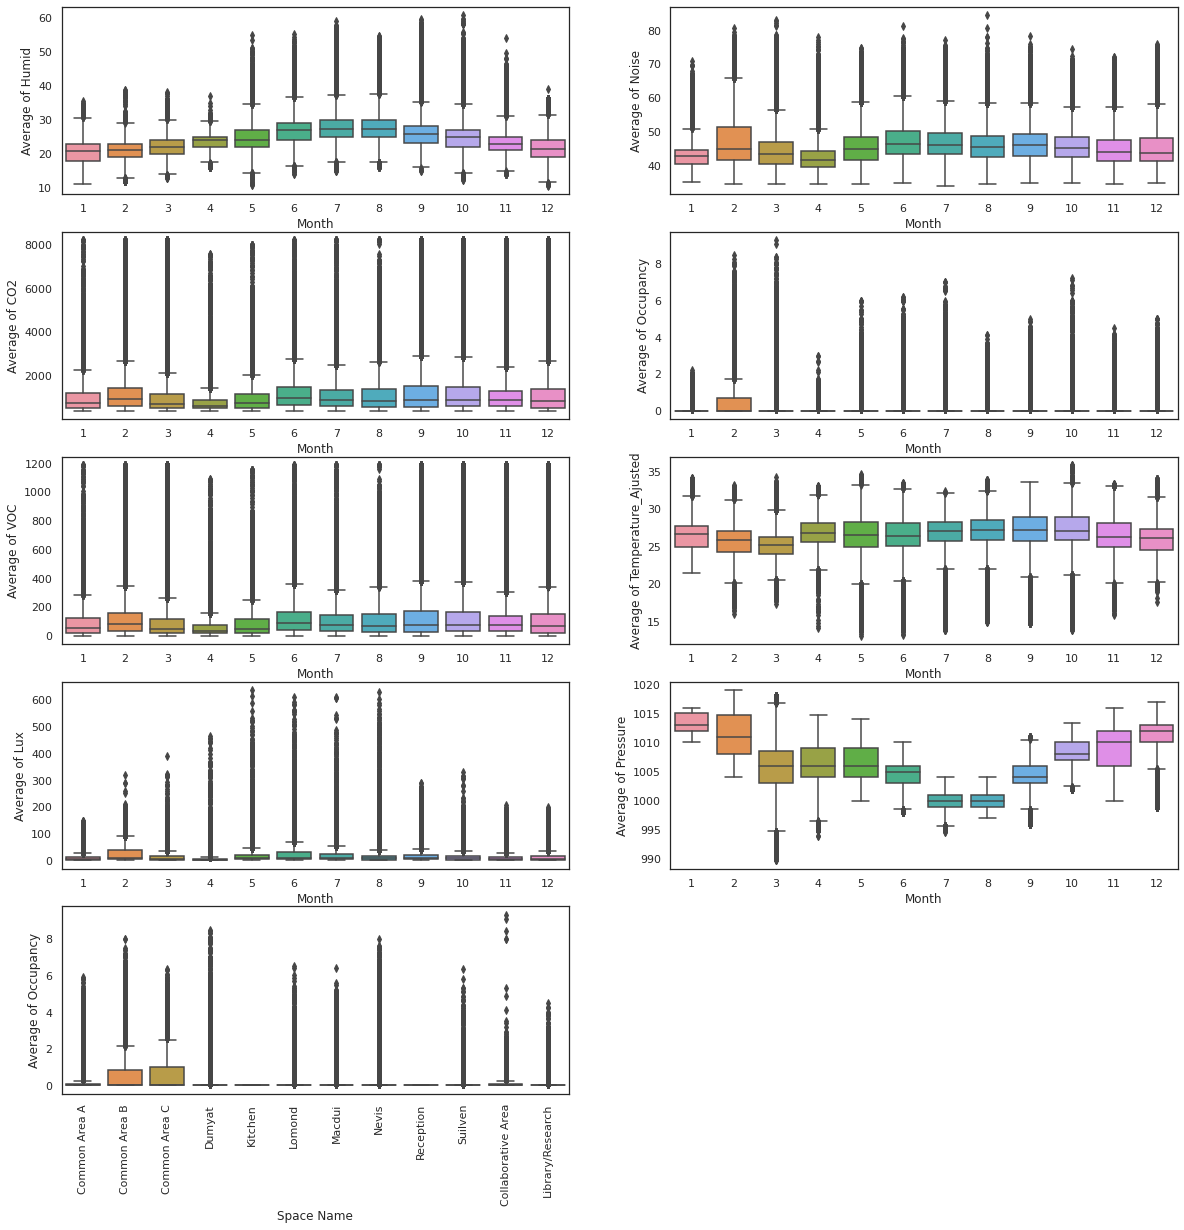

In [109]:
def boxplot(df):
    plt.figure(figsize=(20,20))
    plt.subplot(5,2,1)
    sns.boxplot(x='Month',y='Average of Humid',data=df)
    plt.subplot(5,2,2)
    sns.boxplot(x='Month',y='Average of Noise',data=df)
    plt.subplot(5,2,3)
    sns.boxplot(x='Month',y='Average of CO2',data=df)
    plt.subplot(5,2,4)
    sns.boxplot(x='Month',y='Average of Occupancy',data=df)
    plt.subplot(5,2,5)
    sns.boxplot(x='Month',y='Average of VOC',data=df)
    plt.subplot(5,2,6)
    sns.boxplot(x='Month',y='Average of Temperature_Ajusted',data=df)
    plt.subplot(5,2,7)
    sns.boxplot(x='Month',y='Average of Lux',data=df)
    plt.subplot(5,2,8)
    sns.boxplot(x='Month',y='Average of Pressure',data=df)
    plt.subplot(5,2,9)
    ax=sns.boxplot(x='Space Name',y='Average of Occupancy',data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

boxplot(df)   

## Space performance over months ( Covid19 impact) 
p.s
space with presence>0 for all months are only considered here



In [110]:
    sp=df.groupby(['Date','Space Name']).mean().reset_index()
    sp=sp[sp['Average of Presence']>0]
    sp=df.groupby(['Date','Space Name']).mean().reset_index()


In [112]:
sp['Space Name'].unique()

array(['Common Area A', 'Common Area B', 'Common Area C', 'Dumyat',
       'Lomond', 'Macdui', 'Nevis', 'Suilven', 'Collaborative Area',
       'Library/Research'], dtype=object)

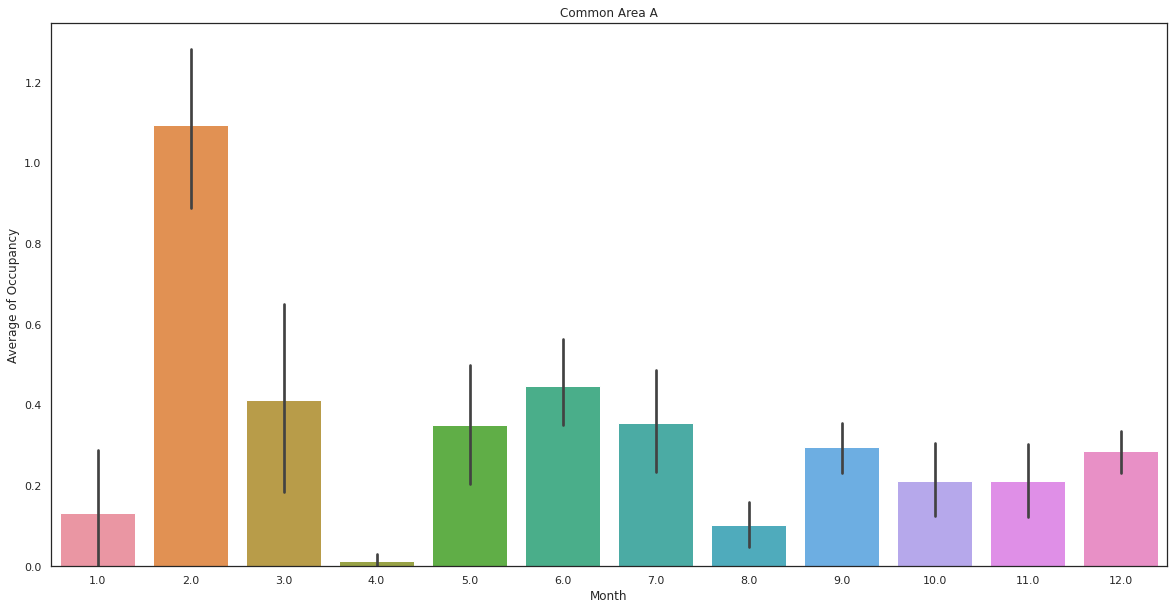

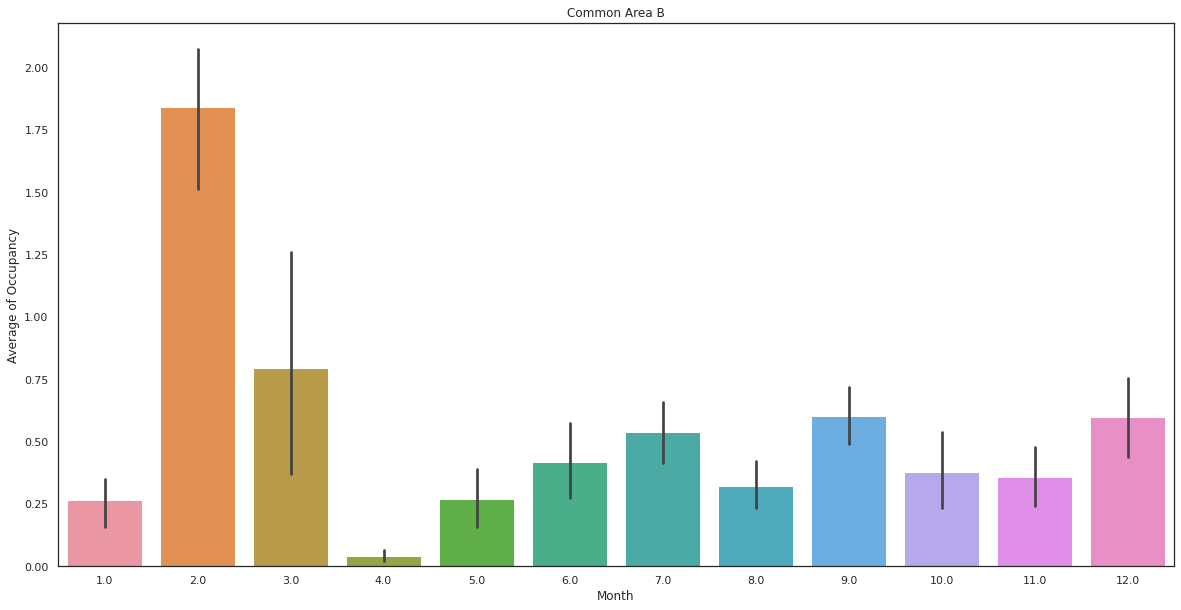

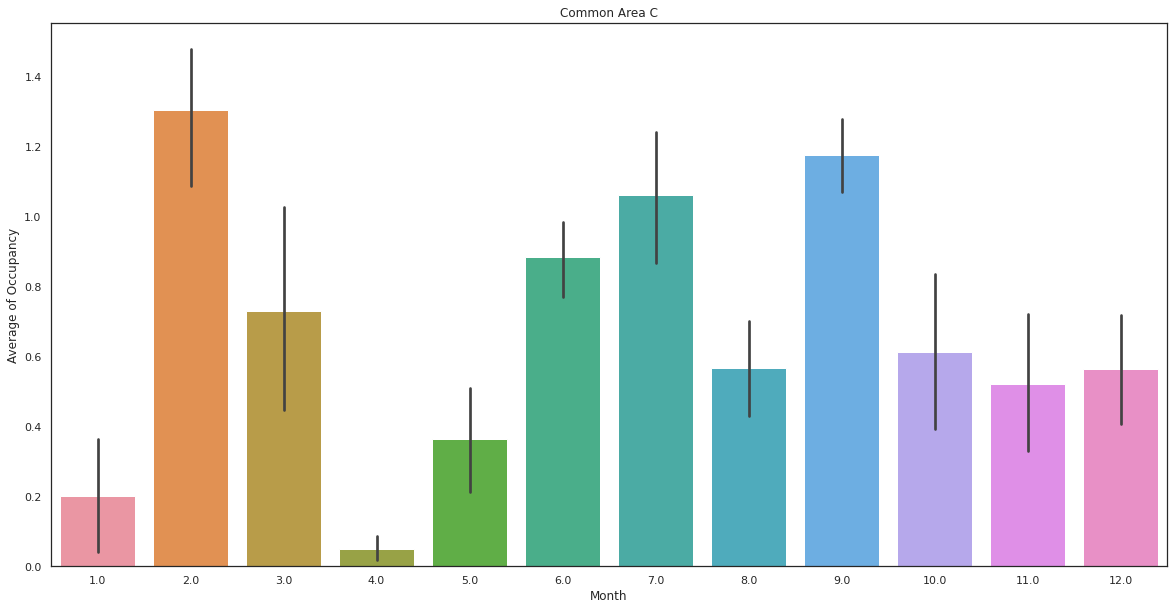

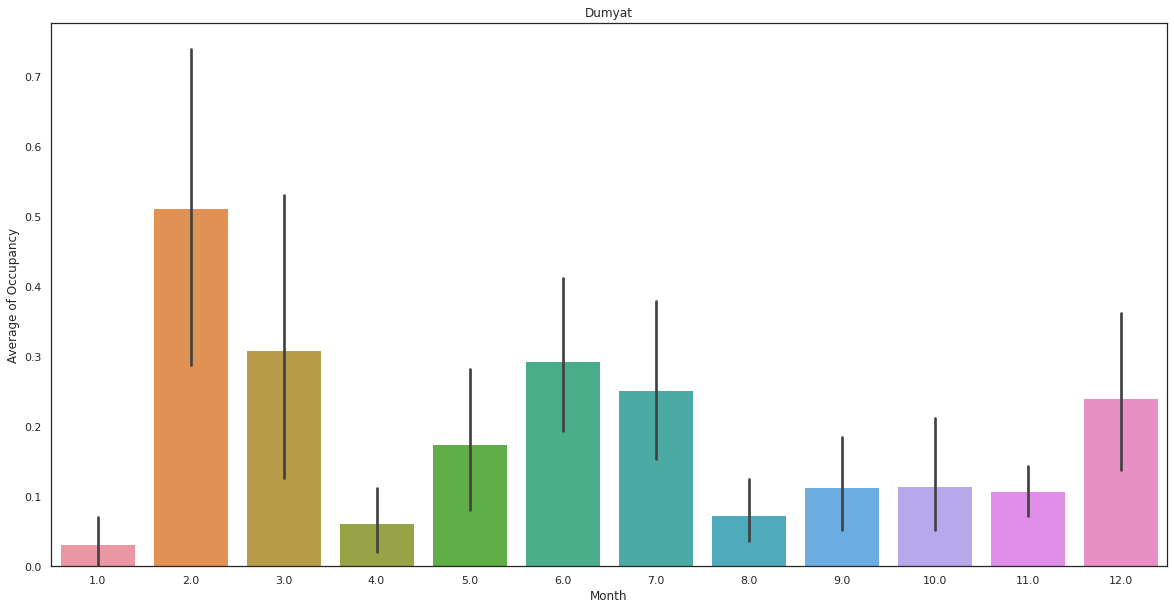

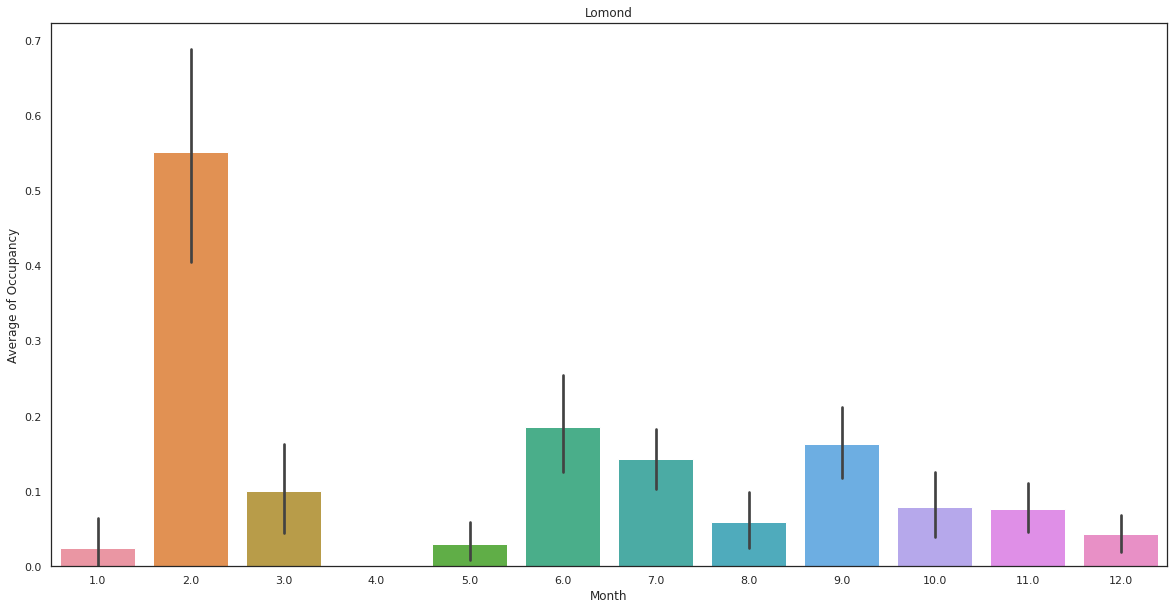

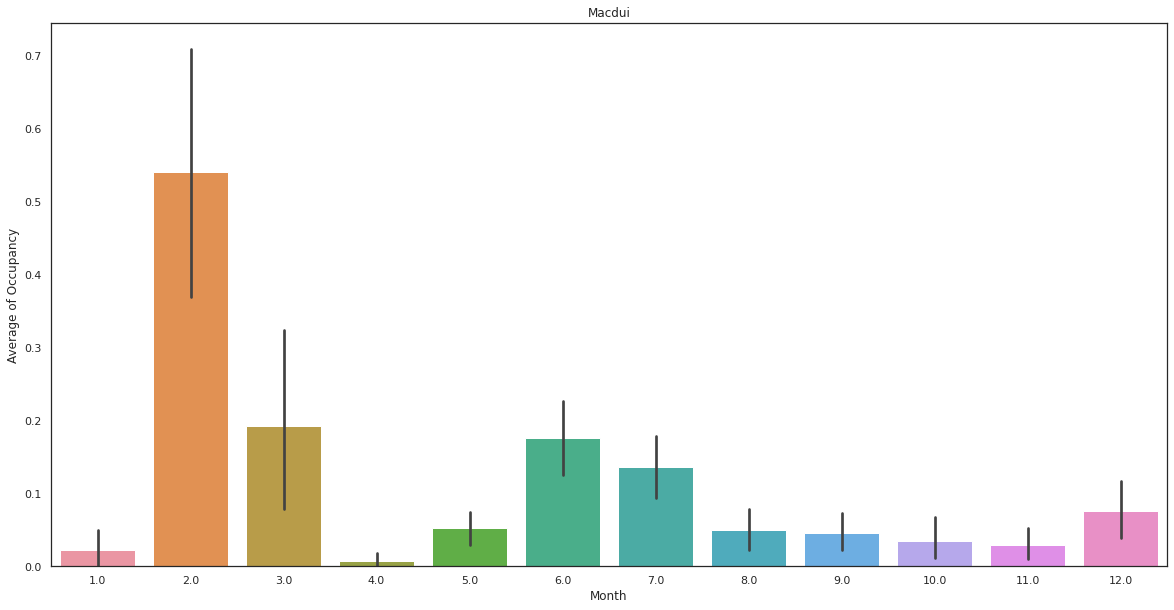

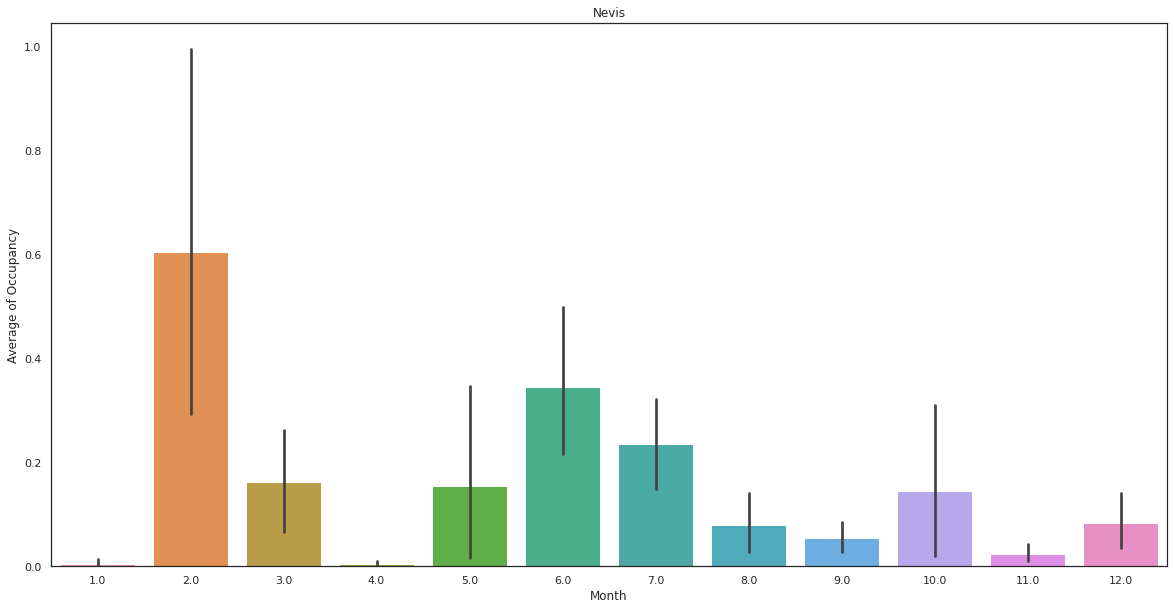

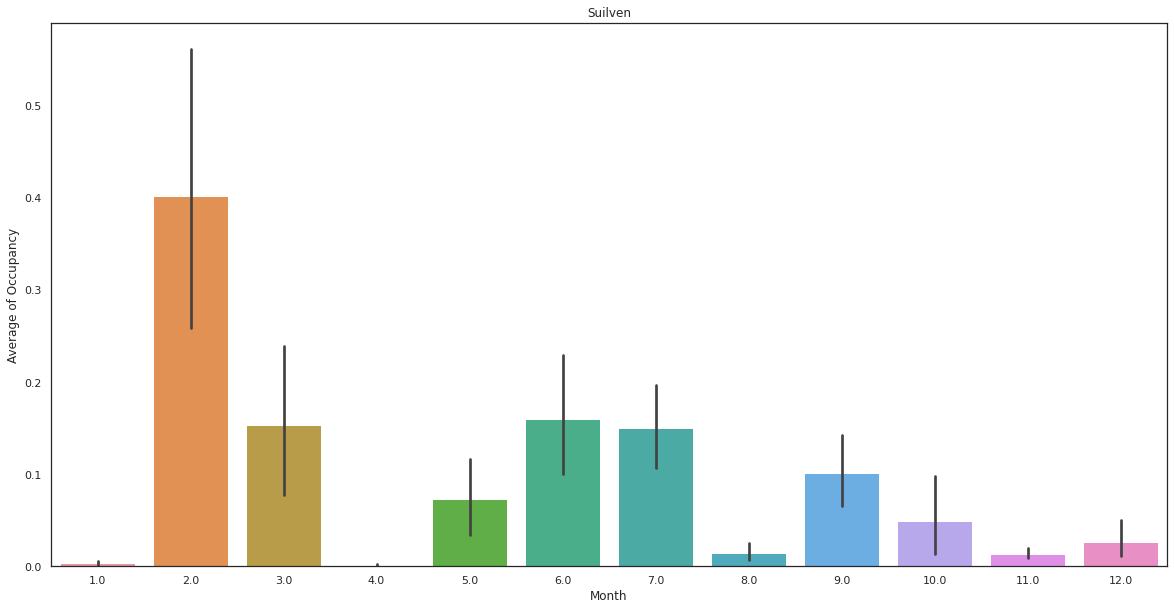

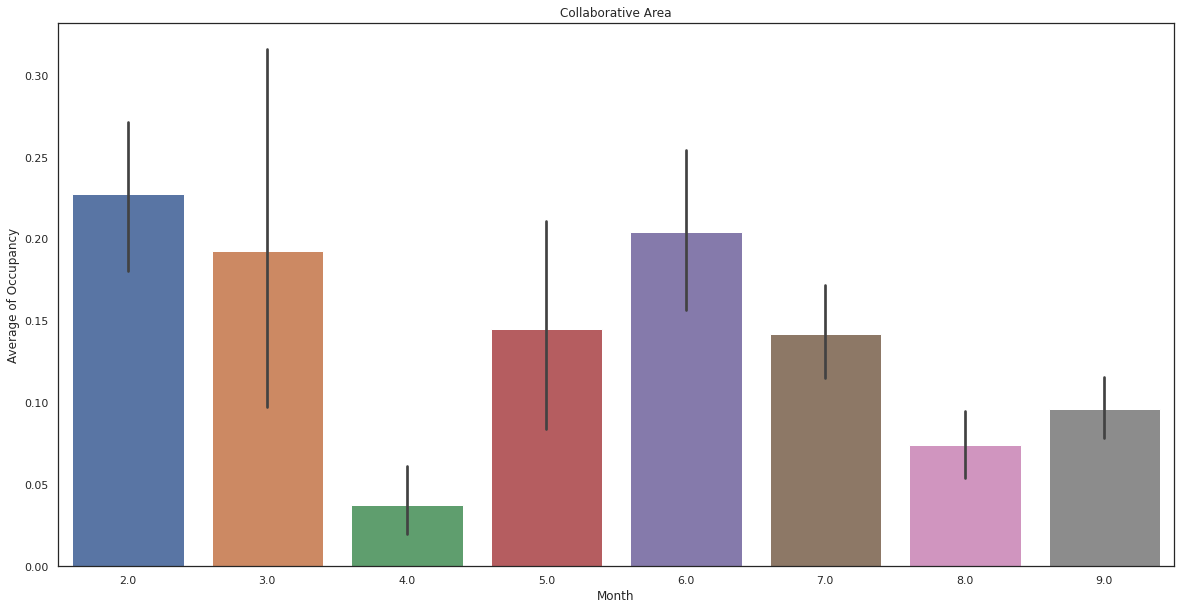

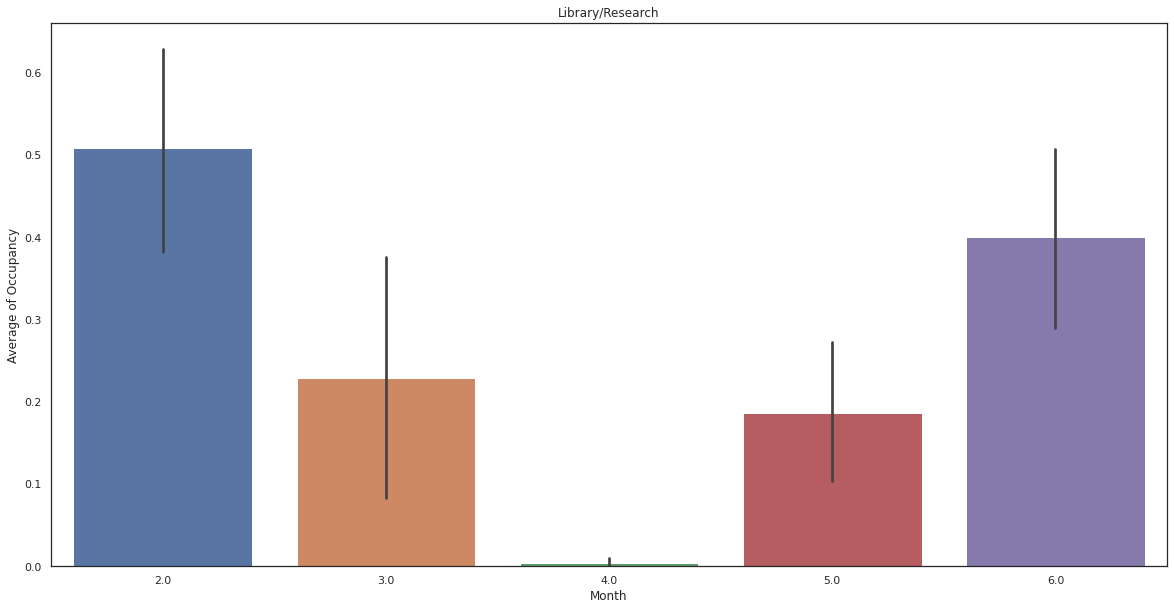

In [113]:
spaces=['Common Area A', 'Common Area B', 'Common Area C', 'Dumyat',
       'Lomond', 'Macdui', 'Nevis', 'Suilven', 'Collaborative Area',
       'Library/Research']
for i in range (len(spaces)):
    plt.figure(figsize=(20,10))
    sp=df.groupby(['Date','Space Name']).mean().reset_index()
    sns.barplot(x='Month',y='Average of Occupancy',data=(sp[sp['Space Name']==spaces[i]])).set_title(str(spaces[i]))



## Month wise analysis of Spaces

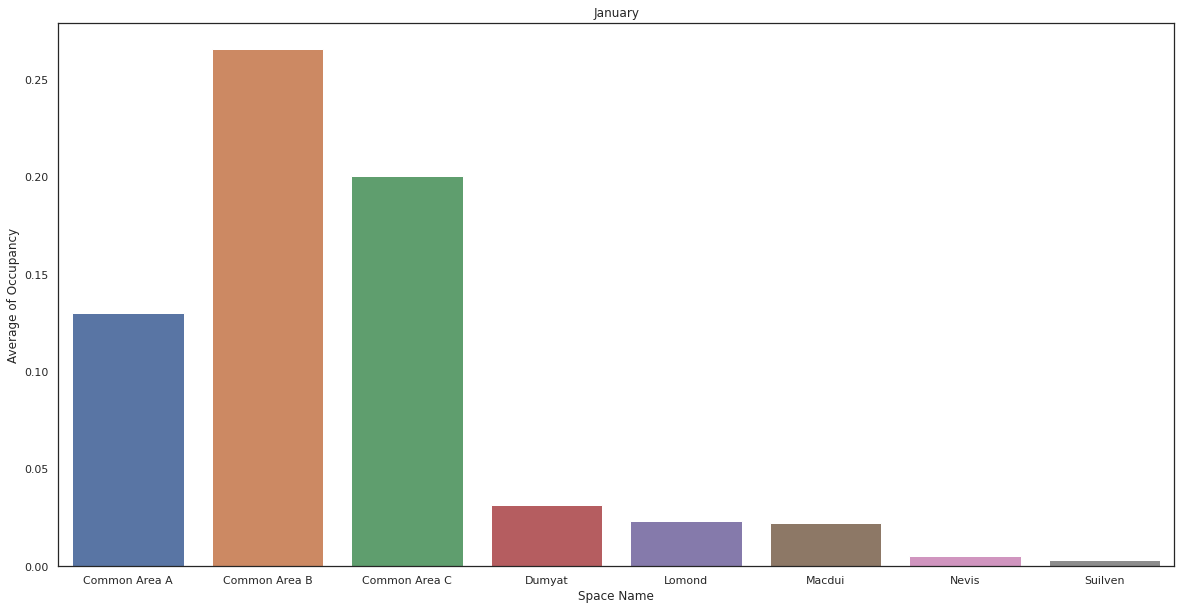

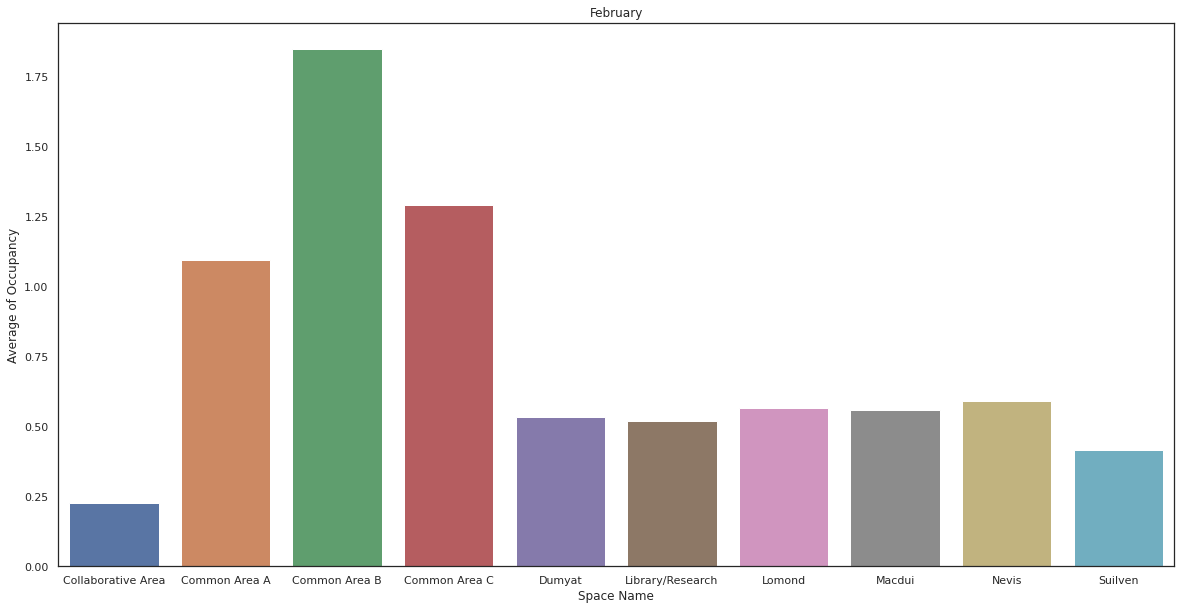

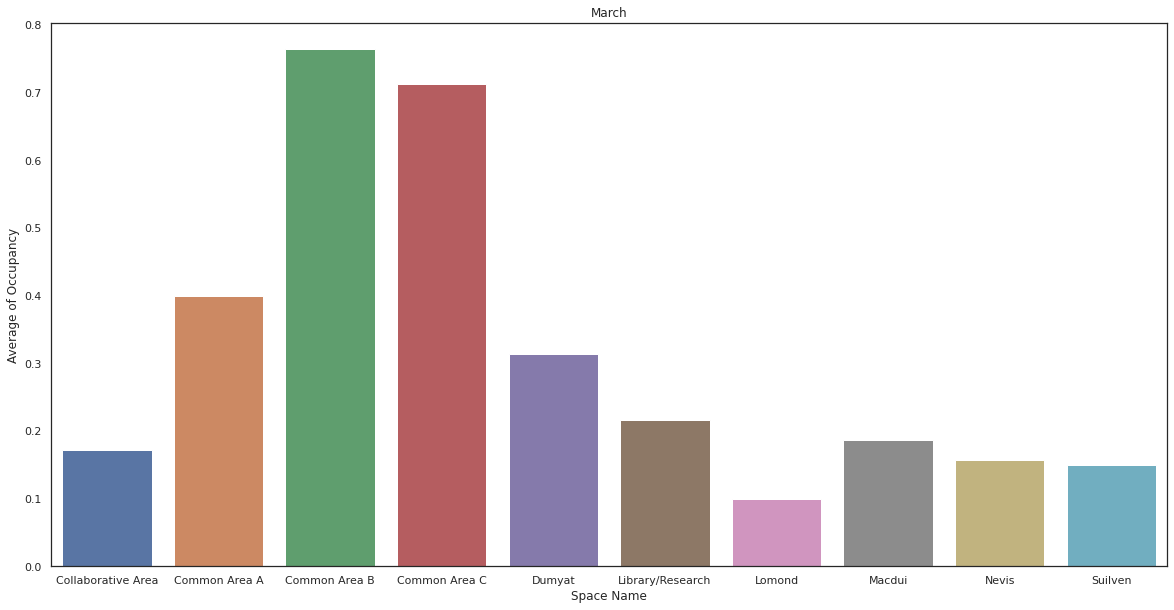

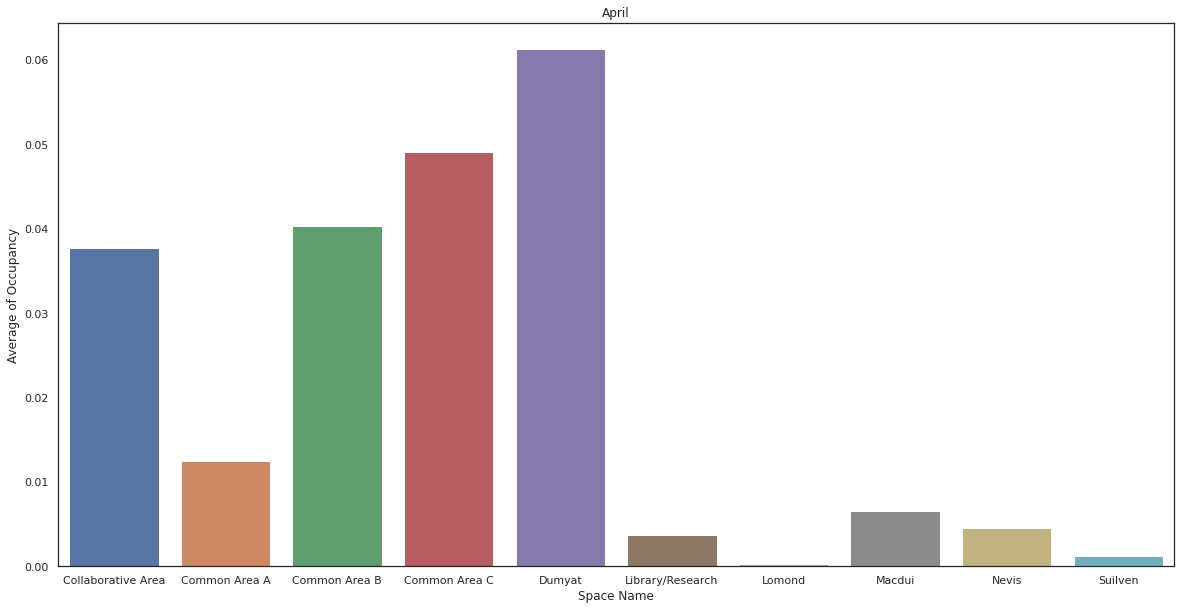

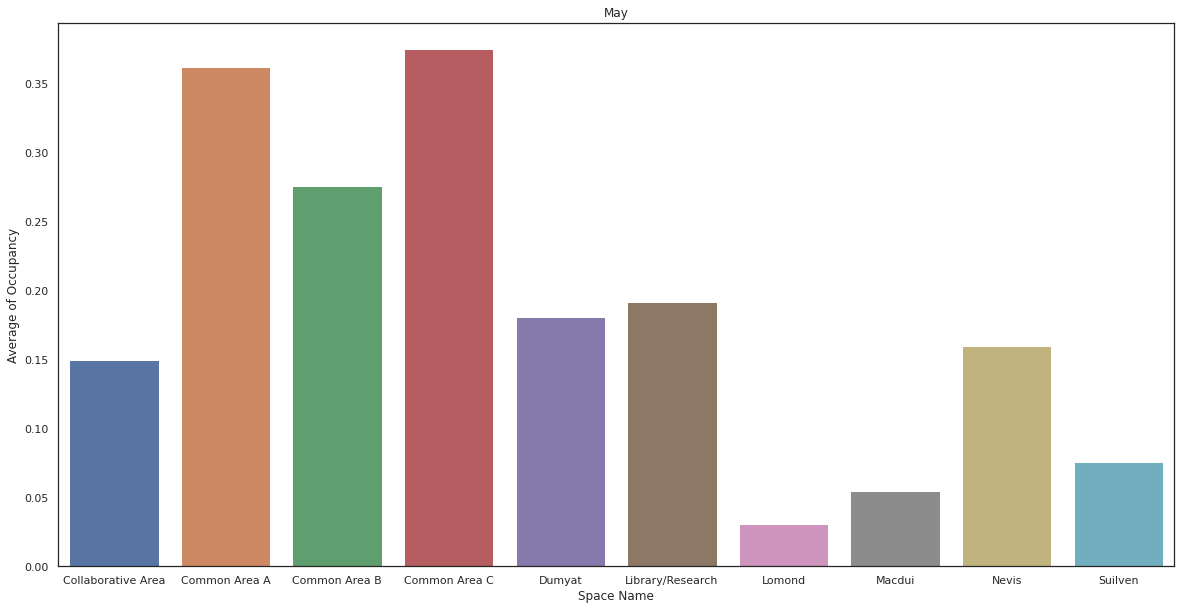

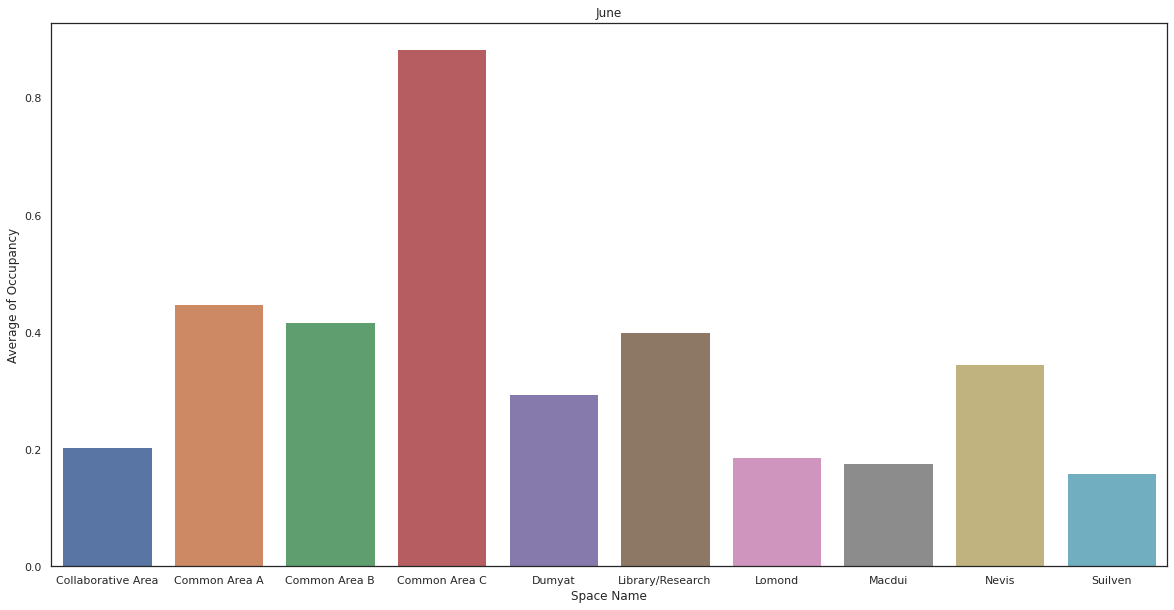

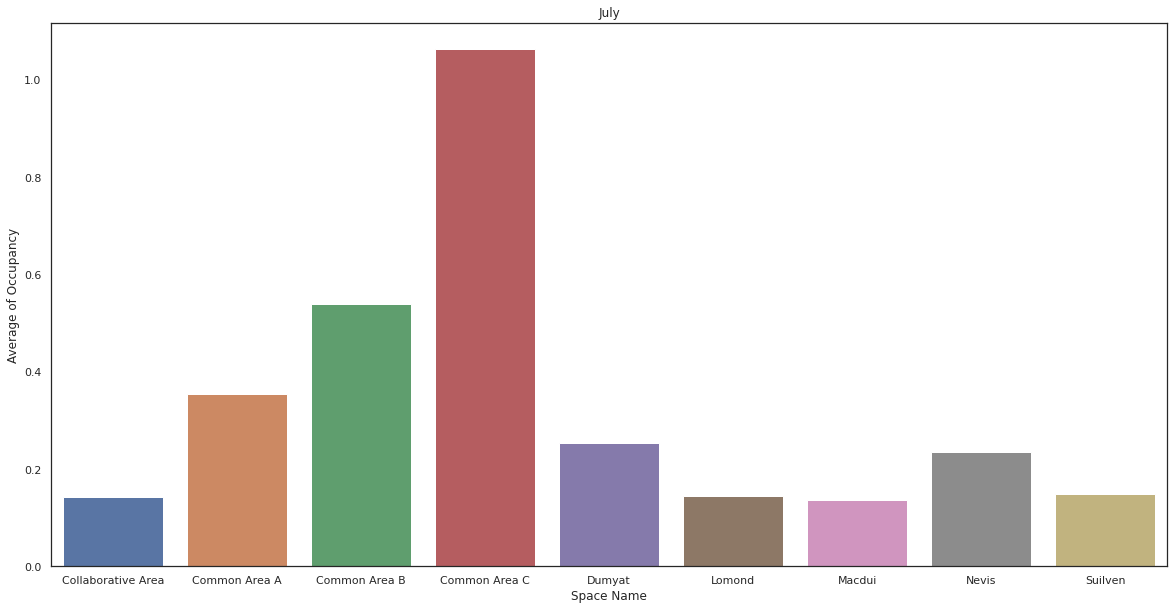

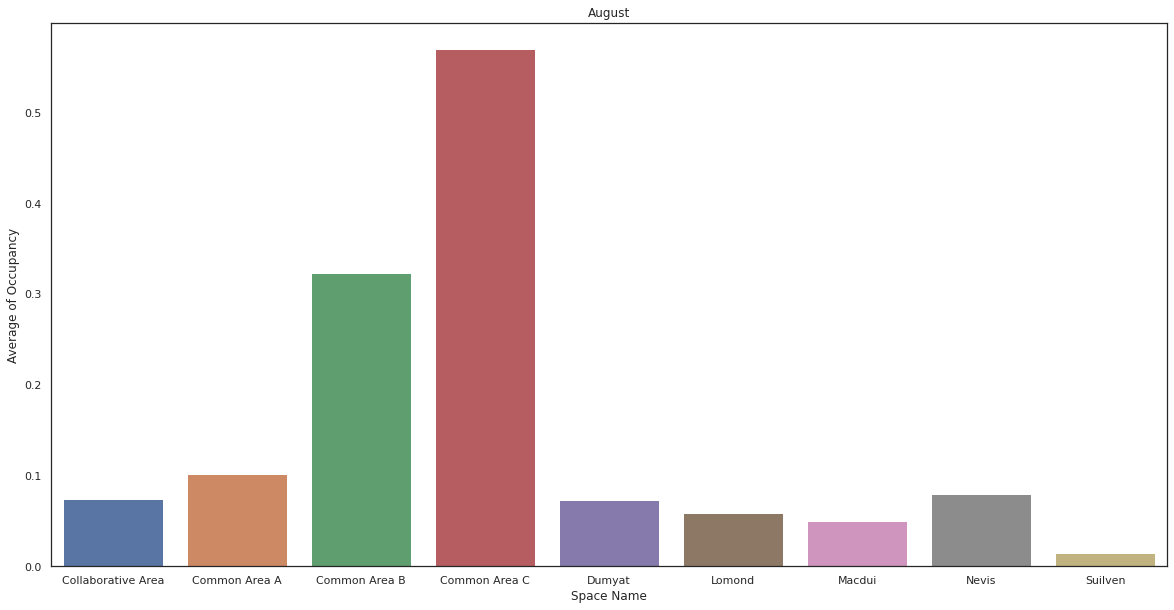

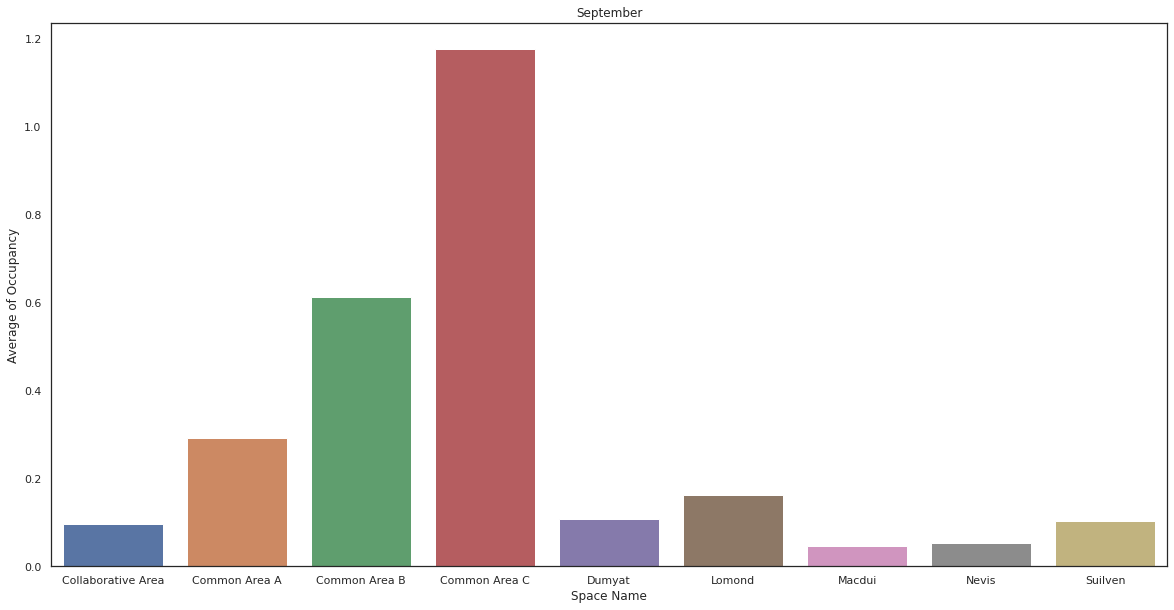

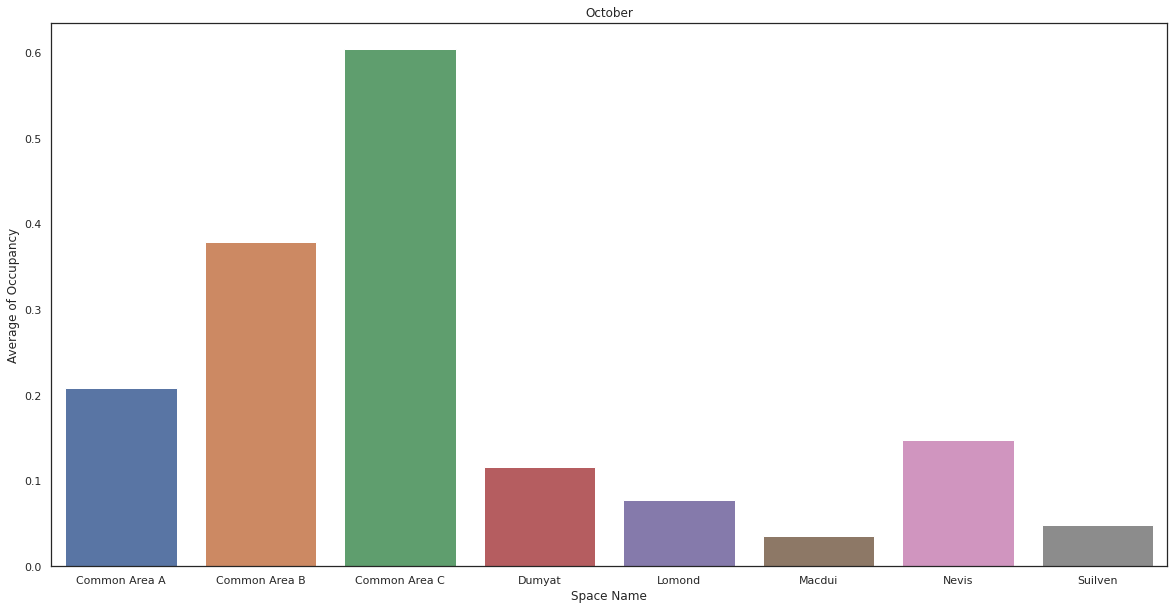

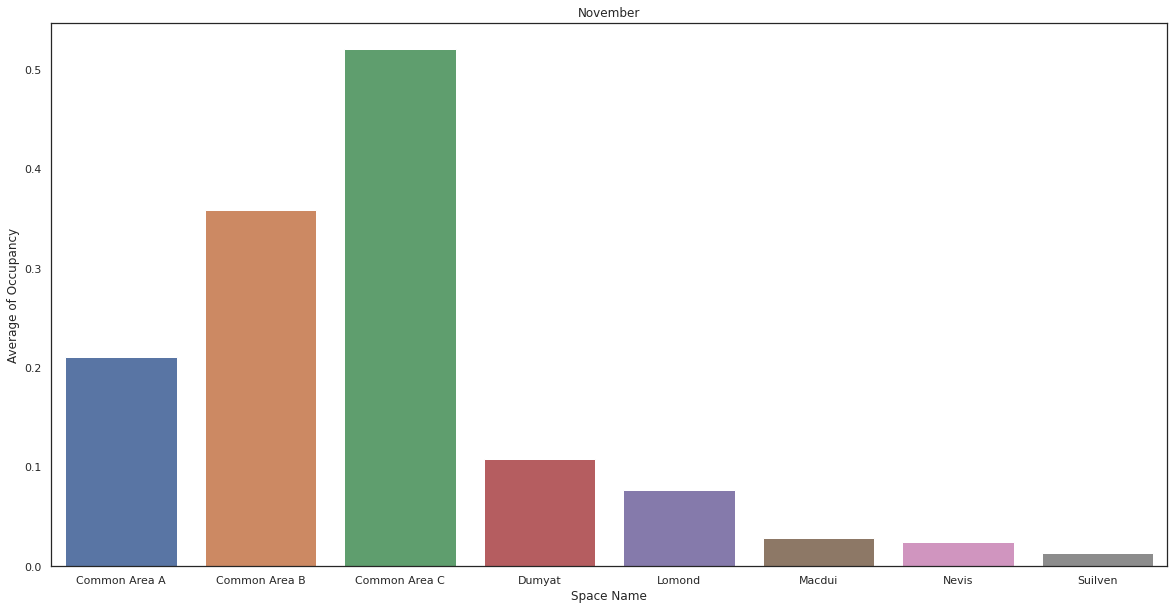

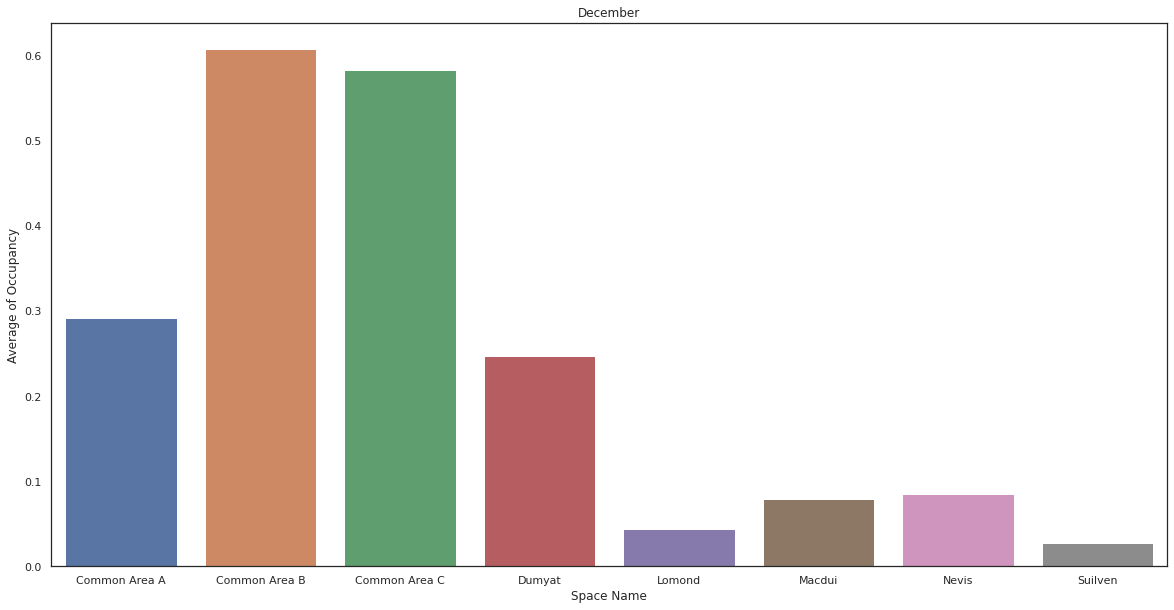

In [78]:
months=['January','February','March','April','May','June','July','August','September','October','November','December',]
for i in range (len(months)):
    plt.figure(figsize=(20,10))
    sp=df.groupby(['MonthName','Space Name']).mean().reset_index()
    sp=sp[sp['Average of Presence']>0]

    sns.barplot(x='Space Name',y='Average of Occupancy',data=(sp[sp['MonthName']==months[i]])).set_title((months[i]))


Common area c was very active during Covid19 peak time period(Apri-August)

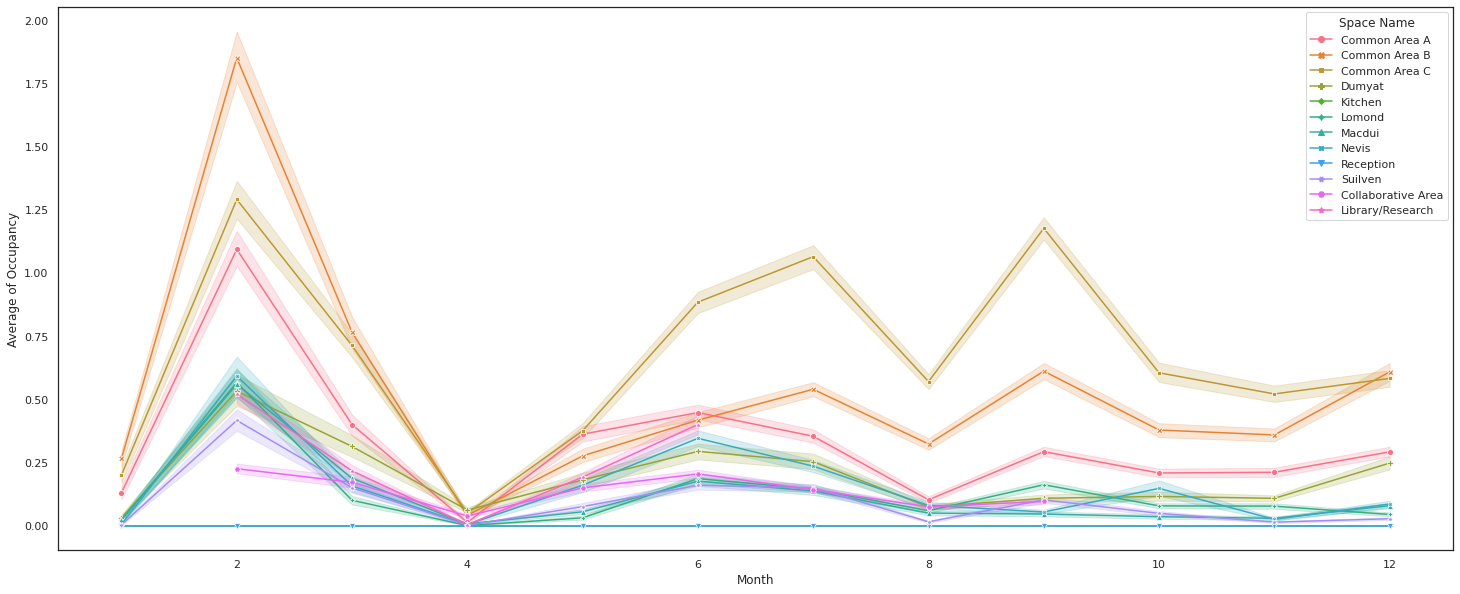

In [79]:
plt.figure(figsize=(25,10))
sns.lineplot(data=df, x="Month", y="Average of Occupancy",hue="Space Name",style="Space Name",markers=True, dashes=False)

## Correlations/relationships across different parameters 


1.   except of derived parameters there is no correlation among the paramters.




Text(0.5, 1.0, 'Correlation')

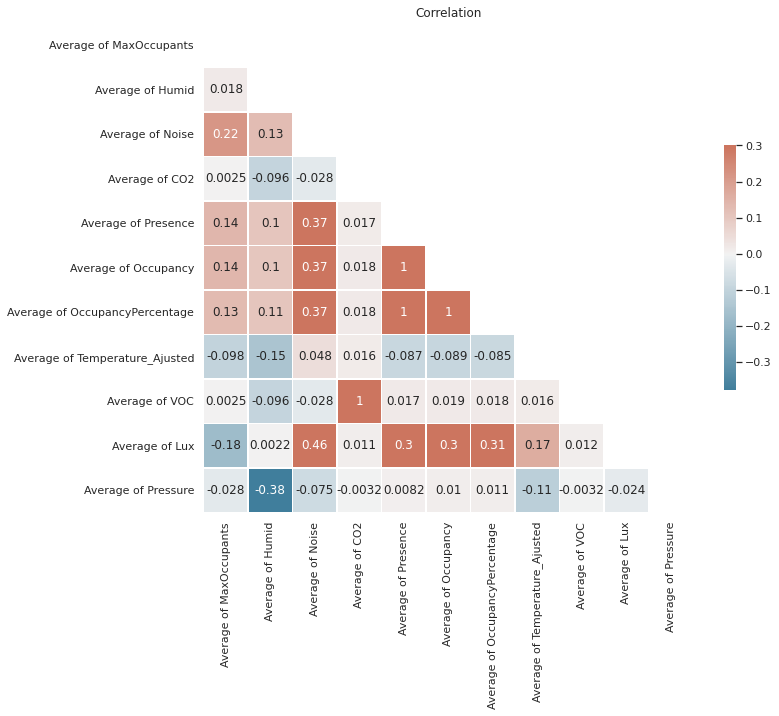

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = df.iloc[:,3:].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr.style.background_gradient(cmap='YlGnBu')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True).set_title('Correlation')

In [81]:
high_correlation = corr[(corr < 1 ) & (corr>0.8)].dropna(how='all')
high_correlation


,Average of MaxOccupants,Average of Humid,Average of Noise,Average of CO2,Average of Presence,Average of Occupancy,Average of OccupancyPercentage,Average of Temperature_Ajusted,Average of VOC,Average of Lux,Average of Pressure
Average of CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9997,NaN,NaN
Average of Presence,NaN,NaN,NaN,NaN,NaN,0.998523,0.997724,NaN,NaN,NaN,NaN
Average of Occupancy,NaN,NaN,NaN,NaN,0.998523,NaN,0.999061,NaN,NaN,NaN,NaN
Average of OccupancyPercentage,NaN,NaN,NaN,NaN,0.997724,0.999061,NaN,NaN,NaN,NaN,NaN
Average of VOC,NaN,NaN,NaN,0.9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is no correlation existing between the parameters

## Time series-based understandings 


*   Future Forecasting/Prediction models




###  *Future Forecasting/Prediction models using* **LSTM**

In [ ]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


np.random.seed(7)


In [ ]:
df['Space Name'].unique()

array(['Common Area A', 'Common Area B', 'Common Area C', 'Dumyat',
       'Kitchen', 'Lomond', 'Macdui', 'Nevis', 'Reception', 'Suilven',
       'Collaborative Area', 'Library/Research'], dtype=object)

In [ ]:
df.columns

Index(['Day', 'Month', 'Hr', 'MinuteZone', 'DateTime', 'Date', 'MonthName',
       'Space Name', 'Average of MaxOccupants', 'Average of Humid',
       'Average of Noise', 'Average of CO2', 'Average of Presence',
       'Average of Occupancy', 'Average of OccupancyPercentage',
       'Average of Temperature_Ajusted', 'Average of VOC', 'Average of Lux',
       'Average of Pressure'],
      dtype='object')

In [ ]:
df['Presence']=np.where(df['Average of Presence']==100, 1, 0)
df['Presence'].unique()

array([0, 1])

In [ ]:
rooms=sorted(df['Space Name'].unique().tolist())

space = {}

for room in rooms:
  sp=df.groupby(['DateTime','Space Name']).mean().reset_index()
  space[room]=sp[sp['Space Name']==room]
  space[room].set_index('DateTime', inplace=True)



In [ ]:
trainz=space
for key in trainz.keys():
    Occupancy=trainz[key]['Average of Occupancy']
    trainz[key]['Occupancy']=trainz[key]['Average of Occupancy']

    # trainz[key].insert(2, 'Occupancy', Occupancy)
    trainz[key].drop(['Space Name', 'Day', 'Month', 'Hr', 'Average of Occupancy','Average of Presence', 'Average of Occupancy','Average of MaxOccupants','Average of OccupancyPercentage','Presence'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
trainz[key]

Predictive model will wil built on each room to forecast using LSTM.

train and test split= till 23/11 will be training data (80%) and rest test
this wil help us capture the covid19 impact beofer the second wave.  

individual evaluation metrics for each space is anlysed using MAE,MSE and RMSE and R2. 
overall  R2~1 can be considered a ideal model.


In [ ]:
trainz.keys()
keys=['Collaborative Area', 'Common Area A', 'Common Area B', 'Common Area C', 'Dumyat', 'Lomond', 'Macdui', 'Nevis', 'Suilven']

Collaborative Area
X_train (14174, 12, 8)
y_train (14174,)
X_test (3543, 12, 8)
y_test (3543,)
Epoch 1/50
25/25 [==============================] - 24s 829ms/step - loss: 0.0012 - mean_absolute_error: 0.0200 - val_loss: 4.1509e-04 - val_mean_absolute_error: 0.0137
Epoch 2/50
25/25 [==============================] - 20s 795ms/step - loss: 0.0010 - mean_absolute_error: 0.0189 - val_loss: 3.4013e-04 - val_mean_absolute_error: 0.0067
Epoch 3/50
25/25 [==============================] - 20s 795ms/step - loss: 9.2250e-04 - mean_absolute_error: 0.0174 - val_loss: 3.2669e-04 - val_mean_absolute_error: 0.0088
Epoch 4/50
25/25 [==============================] - 20s 795ms/step - loss: 8.6685e-04 - mean_absolute_error: 0.0169 - val_loss: 3.2167e-04 - val_mean_absolute_error: 0.0050
Epoch 5/50
25/25 [==============================] - 21s 829ms/step - loss: 8.1315e-04 - mean_absolute_error: 0.0152 - val_loss: 3.0879e-04 - val_mean_absolute_error: 0.0058
Epoch 6/50
25/25 [==============================

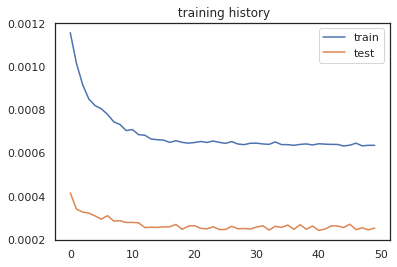

Train Score: 0.00058 MSE (0.02 RMSE)
Test Score: 0.00150 MSE (0.04 RMSE)


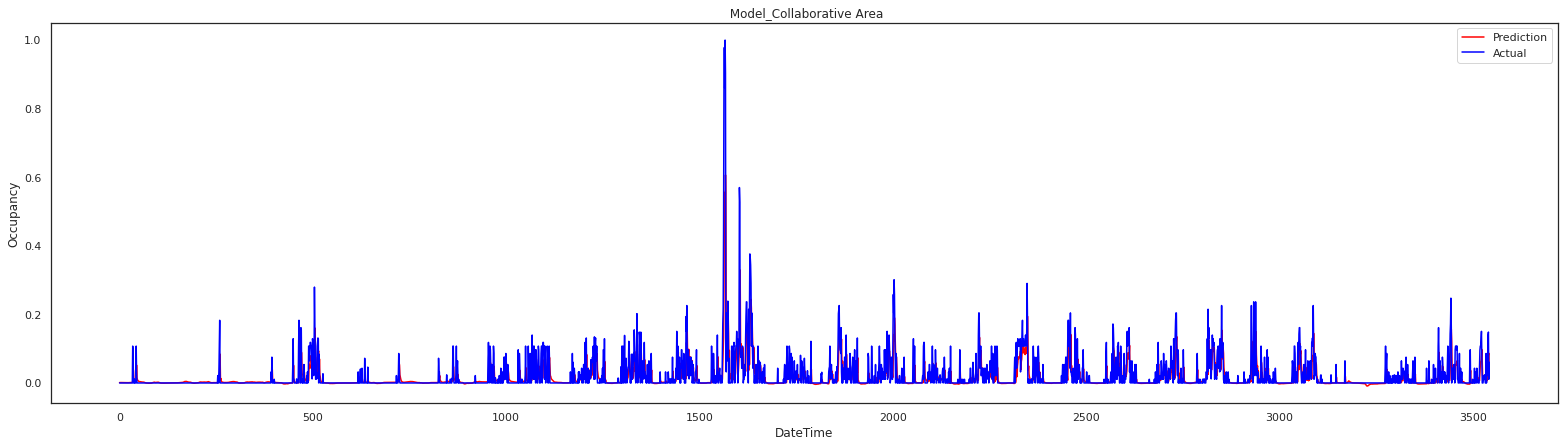

Collaborative Area
Mean squared error: 000.00
Root Mean squared error: 000.04
Mean Absolute Error: 000.02 
R2 score: 000.52
Common Area A
X_train (21603, 12, 8)
y_train (21603,)
X_test (5401, 12, 8)
y_test (5401,)
Epoch 1/50
38/38 [==============================] - 34s 792ms/step - loss: 0.0083 - mean_absolute_error: 0.0558 - val_loss: 0.0011 - val_mean_absolute_error: 0.0142
Epoch 2/50
38/38 [==============================] - 29s 753ms/step - loss: 0.0043 - mean_absolute_error: 0.0368 - val_loss: 9.3481e-04 - val_mean_absolute_error: 0.0128
Epoch 3/50
38/38 [==============================] - 29s 776ms/step - loss: 0.0031 - mean_absolute_error: 0.0289 - val_loss: 7.4472e-04 - val_mean_absolute_error: 0.0097
Epoch 4/50
38/38 [==============================] - 29s 772ms/step - loss: 0.0025 - mean_absolute_error: 0.0258 - val_loss: 5.9305e-04 - val_mean_absolute_error: 0.0078
Epoch 5/50
38/38 [==============================] - 29s 759ms/step - loss: 0.0023 - mean_absolute_error: 0.0240 - 

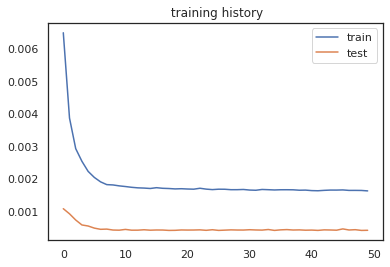

Train Score: 0.00147 MSE (0.04 RMSE)
Test Score: 0.00410 MSE (0.06 RMSE)


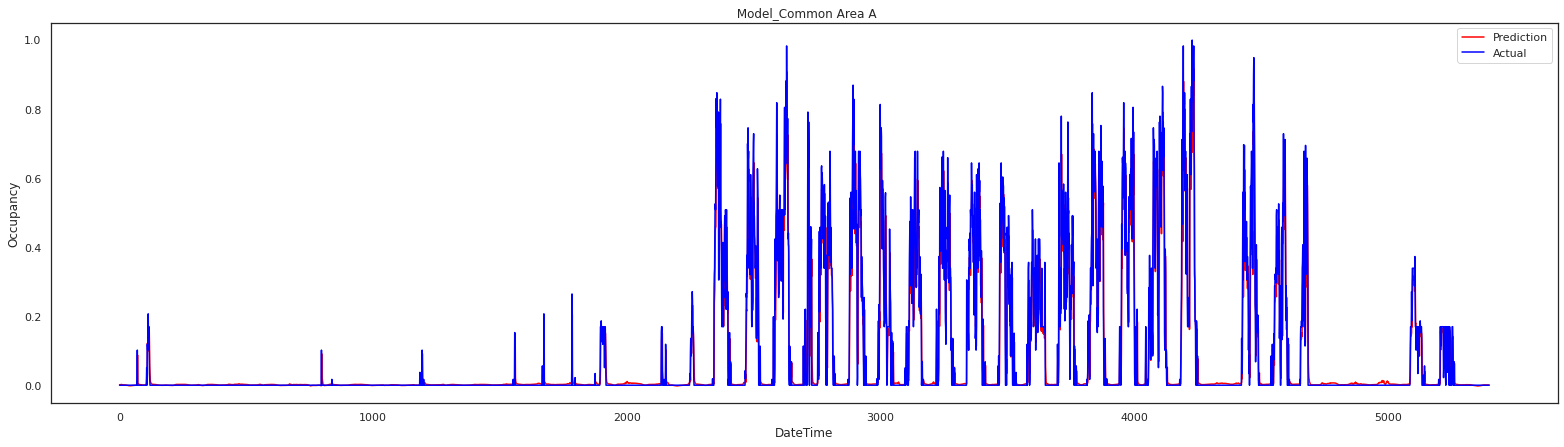

Common Area A
Mean squared error: 000.00
Root Mean squared error: 000.06
Mean Absolute Error: 000.03 
R2 score: 000.88
Common Area B
X_train (21619, 12, 8)
y_train (21619,)
X_test (5405, 12, 8)
y_test (5405,)
Epoch 1/50
39/39 [==============================] - 33s 764ms/step - loss: 0.0086 - mean_absolute_error: 0.0626 - val_loss: 0.0018 - val_mean_absolute_error: 0.0231
Epoch 2/50
39/39 [==============================] - 29s 746ms/step - loss: 0.0046 - mean_absolute_error: 0.0431 - val_loss: 0.0015 - val_mean_absolute_error: 0.0209
Epoch 3/50
39/39 [==============================] - 29s 754ms/step - loss: 0.0035 - mean_absolute_error: 0.0366 - val_loss: 0.0065 - val_mean_absolute_error: 0.0731
Epoch 4/50
39/39 [==============================] - 30s 767ms/step - loss: 0.0060 - mean_absolute_error: 0.0565 - val_loss: 0.0013 - val_mean_absolute_error: 0.0208
Epoch 5/50
39/39 [==============================] - 29s 753ms/step - loss: 0.0029 - mean_absolute_error: 0.0321 - val_loss: 0.0011 

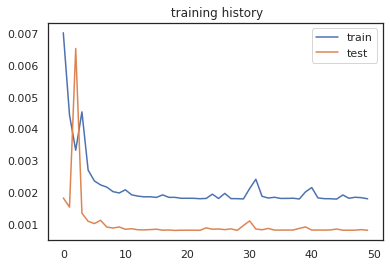

Train Score: 0.00164 MSE (0.04 RMSE)
Test Score: 0.00538 MSE (0.07 RMSE)


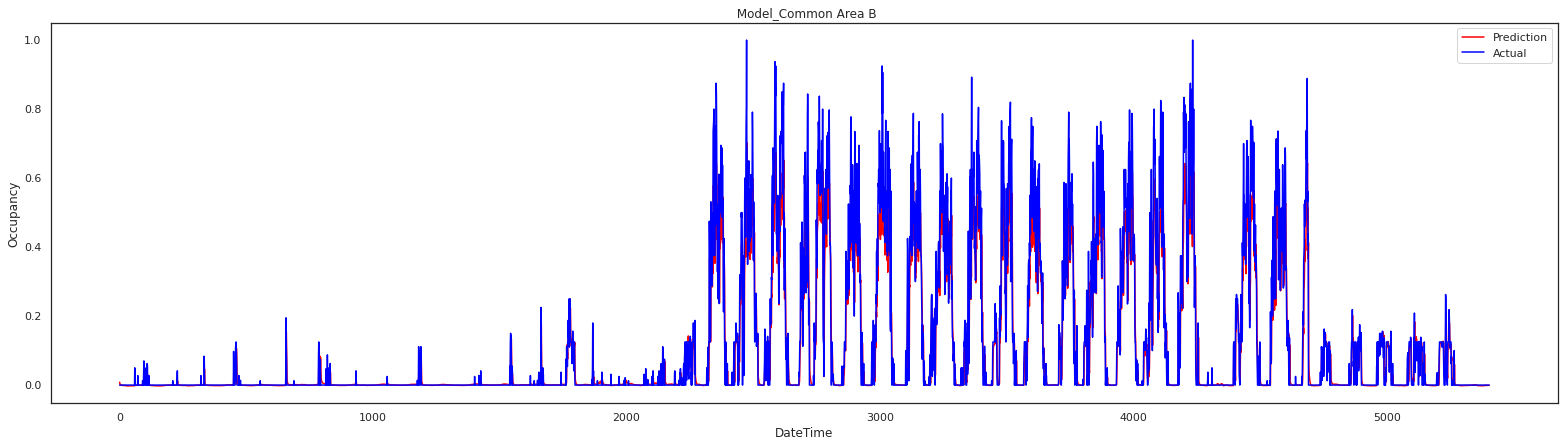

Common Area B
Mean squared error: 000.01
Root Mean squared error: 000.07
Mean Absolute Error: 000.03 
R2 score: 000.88
Common Area C
X_train (21614, 12, 8)
y_train (21614,)
X_test (5403, 12, 8)
y_test (5403,)
Epoch 1/50
38/38 [==============================] - 33s 761ms/step - loss: 0.0263 - mean_absolute_error: 0.1136 - val_loss: 0.0019 - val_mean_absolute_error: 0.0333
Epoch 2/50
38/38 [==============================] - 28s 739ms/step - loss: 0.0109 - mean_absolute_error: 0.0717 - val_loss: 0.0013 - val_mean_absolute_error: 0.0224
Epoch 3/50
38/38 [==============================] - 28s 740ms/step - loss: 0.0089 - mean_absolute_error: 0.0627 - val_loss: 0.0012 - val_mean_absolute_error: 0.0217
Epoch 4/50
38/38 [==============================] - 28s 736ms/step - loss: 0.0074 - mean_absolute_error: 0.0560 - val_loss: 9.6734e-04 - val_mean_absolute_error: 0.0128
Epoch 5/50
38/38 [==============================] - 29s 758ms/step - loss: 0.0064 - mean_absolute_error: 0.0502 - val_loss: 8.7

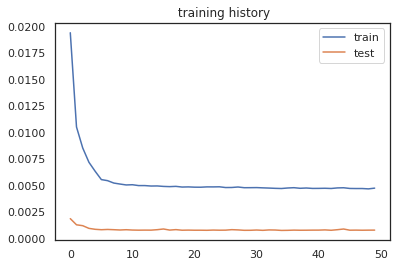

Train Score: 0.00420 MSE (0.06 RMSE)
Test Score: 0.00561 MSE (0.07 RMSE)


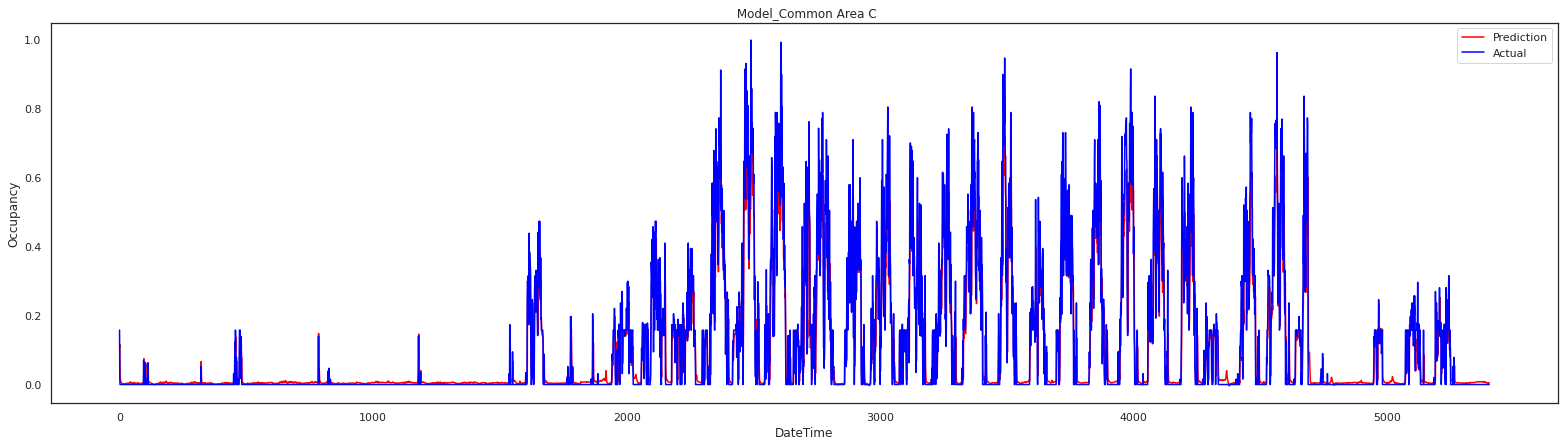

Common Area C
Mean squared error: 000.01
Root Mean squared error: 000.07
Mean Absolute Error: 000.04 
R2 score: 000.85
Dumyat
X_train (21618, 12, 8)
y_train (21618,)
X_test (5404, 12, 8)
y_test (5404,)
Epoch 1/50
38/38 [==============================] - 31s 747ms/step - loss: 0.0045 - mean_absolute_error: 0.0308 - val_loss: 0.0022 - val_mean_absolute_error: 0.0181
Epoch 2/50
38/38 [==============================] - 27s 721ms/step - loss: 0.0025 - mean_absolute_error: 0.0207 - val_loss: 0.0018 - val_mean_absolute_error: 0.0133
Epoch 3/50
38/38 [==============================] - 28s 726ms/step - loss: 0.0019 - mean_absolute_error: 0.0165 - val_loss: 0.0018 - val_mean_absolute_error: 0.0148
Epoch 4/50
38/38 [==============================] - 29s 754ms/step - loss: 0.0016 - mean_absolute_error: 0.0154 - val_loss: 0.0013 - val_mean_absolute_error: 0.0118
Epoch 5/50
38/38 [==============================] - 29s 753ms/step - loss: 0.0013 - mean_absolute_error: 0.0137 - val_loss: 0.0012 - val_m

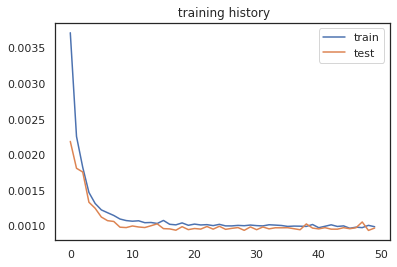

Train Score: 0.00093 MSE (0.03 RMSE)
Test Score: 0.00228 MSE (0.05 RMSE)


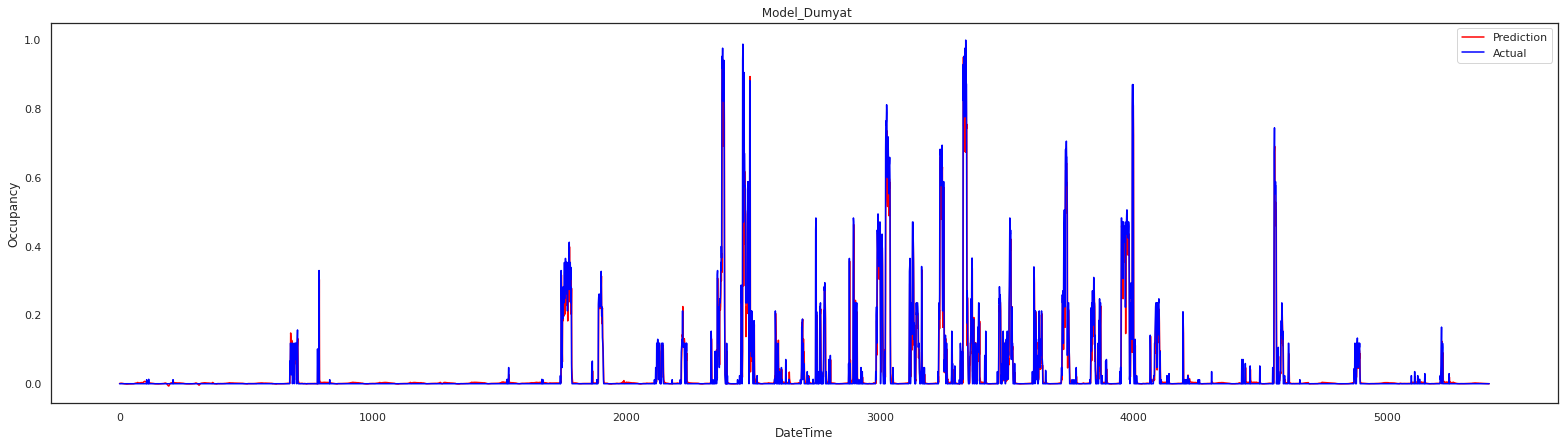

Dumyat
Mean squared error: 000.00
Root Mean squared error: 000.05
Mean Absolute Error: 000.01 
R2 score: 000.84
Lomond
X_train (21546, 12, 8)
y_train (21546,)
X_test (5387, 12, 8)
y_test (5387,)
Epoch 1/50
38/38 [==============================] - 33s 774ms/step - loss: 0.0025 - mean_absolute_error: 0.0233 - val_loss: 1.7602e-04 - val_mean_absolute_error: 0.0042
Epoch 2/50
38/38 [==============================] - 28s 746ms/step - loss: 0.0017 - mean_absolute_error: 0.0174 - val_loss: 1.6182e-04 - val_mean_absolute_error: 0.0027
Epoch 3/50
38/38 [==============================] - 28s 742ms/step - loss: 0.0014 - mean_absolute_error: 0.0149 - val_loss: 1.5419e-04 - val_mean_absolute_error: 0.0031
Epoch 4/50
38/38 [==============================] - 28s 733ms/step - loss: 0.0012 - mean_absolute_error: 0.0139 - val_loss: 1.4957e-04 - val_mean_absolute_error: 0.0022
Epoch 5/50
38/38 [==============================] - 28s 737ms/step - loss: 0.0011 - mean_absolute_error: 0.0129 - val_loss: 1.332

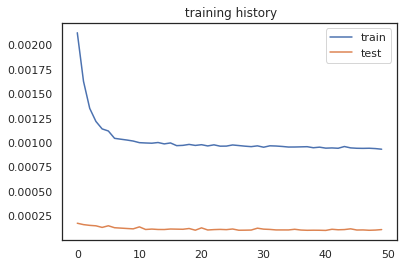

Train Score: 0.00082 MSE (0.03 RMSE)
Test Score: 0.00274 MSE (0.05 RMSE)


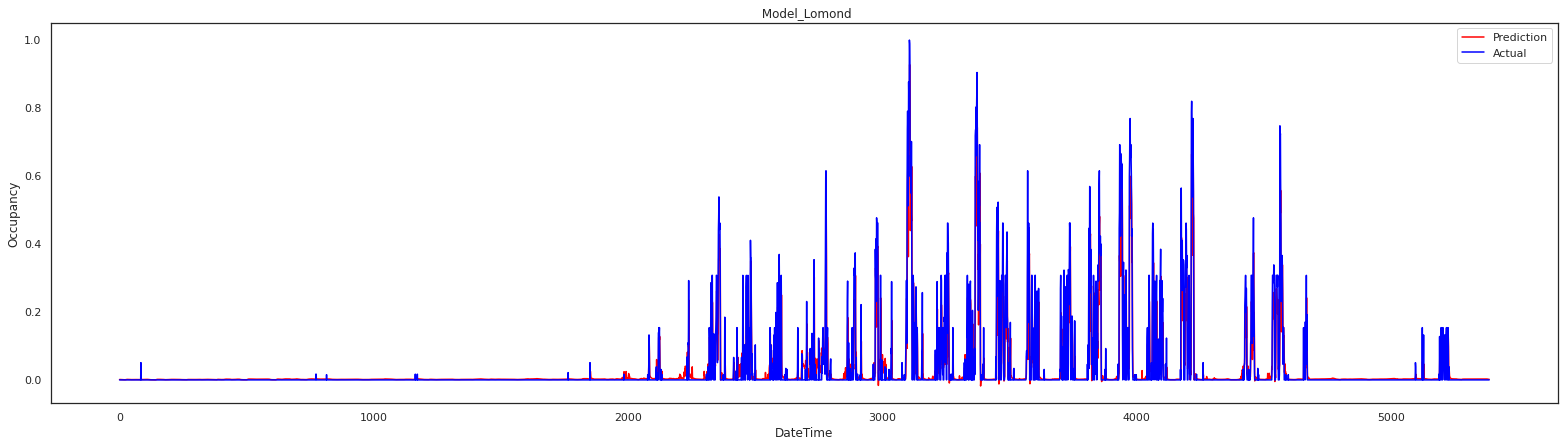

Lomond
Mean squared error: 000.00
Root Mean squared error: 000.05
Mean Absolute Error: 000.02 
R2 score: 000.77
Macdui
X_train (21616, 12, 8)
y_train (21616,)
X_test (5404, 12, 8)
y_test (5404,)
Epoch 1/50
38/38 [==============================] - 33s 788ms/step - loss: 0.0023 - mean_absolute_error: 0.0200 - val_loss: 4.6631e-04 - val_mean_absolute_error: 0.0054
Epoch 2/50
38/38 [==============================] - 29s 753ms/step - loss: 0.0020 - mean_absolute_error: 0.0169 - val_loss: 4.1005e-04 - val_mean_absolute_error: 0.0069
Epoch 3/50
38/38 [==============================] - 29s 751ms/step - loss: 0.0015 - mean_absolute_error: 0.0143 - val_loss: 3.8593e-04 - val_mean_absolute_error: 0.0058
Epoch 4/50
38/38 [==============================] - 28s 747ms/step - loss: 0.0013 - mean_absolute_error: 0.0130 - val_loss: 3.0146e-04 - val_mean_absolute_error: 0.0042
Epoch 5/50
38/38 [==============================] - 29s 761ms/step - loss: 0.0011 - mean_absolute_error: 0.0116 - val_loss: 2.547

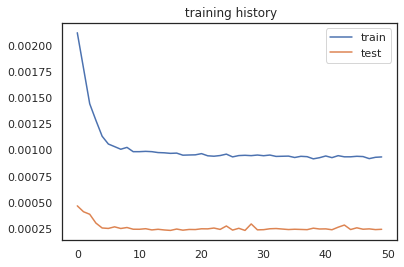

Train Score: 0.00083 MSE (0.03 RMSE)
Test Score: 0.00363 MSE (0.06 RMSE)


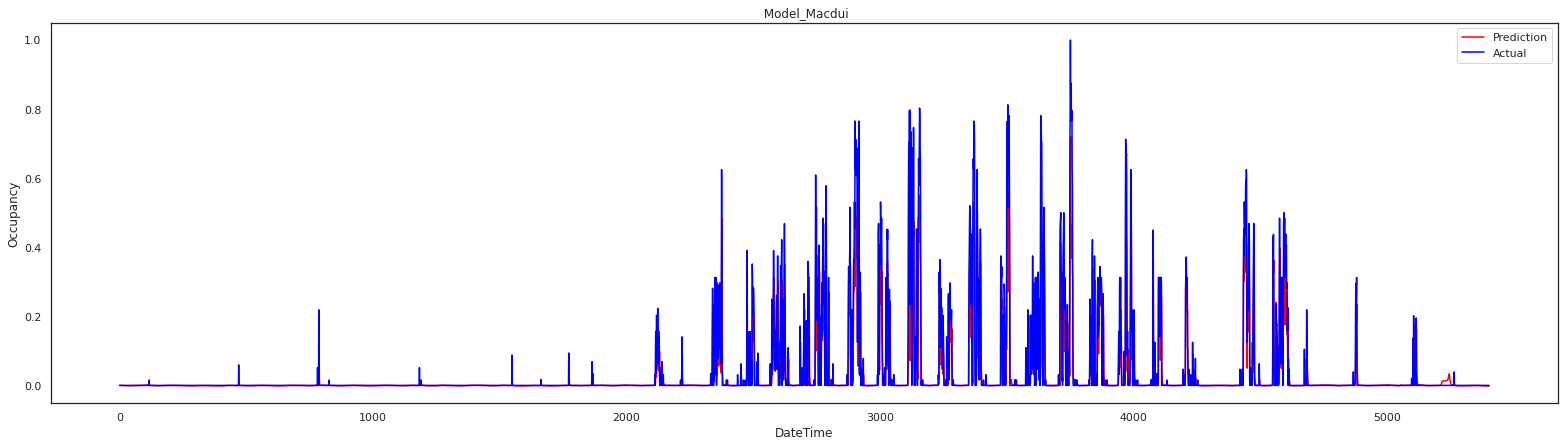

Macdui
Mean squared error: 000.00
Root Mean squared error: 000.06
Mean Absolute Error: 000.02 
R2 score: 000.75
Nevis
X_train (21618, 12, 8)
y_train (21618,)
X_test (5405, 12, 8)
y_test (5405,)
Epoch 1/50
38/38 [==============================] - 34s 792ms/step - loss: 0.0038 - mean_absolute_error: 0.0244 - val_loss: 0.0019 - val_mean_absolute_error: 0.0175
Epoch 2/50
38/38 [==============================] - 29s 764ms/step - loss: 0.0020 - mean_absolute_error: 0.0144 - val_loss: 9.7658e-04 - val_mean_absolute_error: 0.0087
Epoch 3/50
38/38 [==============================] - 28s 746ms/step - loss: 0.0015 - mean_absolute_error: 0.0128 - val_loss: 0.0013 - val_mean_absolute_error: 0.0097
Epoch 4/50
38/38 [==============================] - 29s 757ms/step - loss: 0.0012 - mean_absolute_error: 0.0121 - val_loss: 7.2654e-04 - val_mean_absolute_error: 0.0078
Epoch 5/50
38/38 [==============================] - 28s 747ms/step - loss: 0.0013 - mean_absolute_error: 0.0110 - val_loss: 7.1616e-04 - v

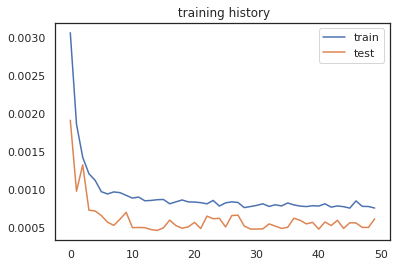

Train Score: 0.00071 MSE (0.03 RMSE)
Test Score: 0.00161 MSE (0.04 RMSE)


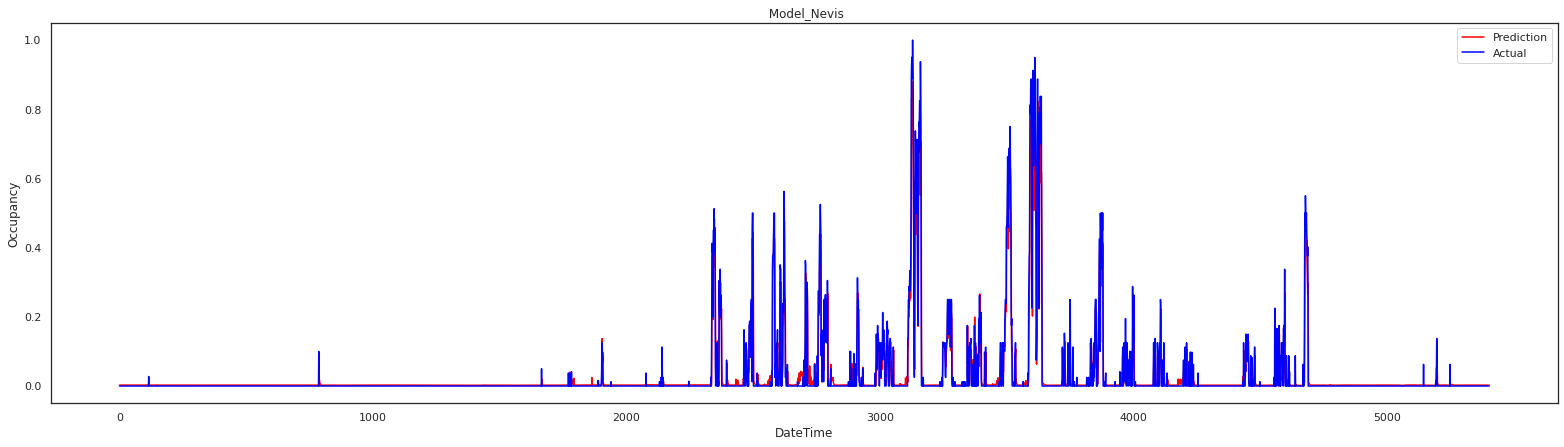

Nevis
Mean squared error: 000.00
Root Mean squared error: 000.04
Mean Absolute Error: 000.01 
R2 score: 000.88
Suilven
X_train (21594, 12, 8)
y_train (21594,)
X_test (5398, 12, 8)
y_test (5398,)
Epoch 1/50
38/38 [==============================] - 34s 808ms/step - loss: 0.0022 - mean_absolute_error: 0.0200 - val_loss: 3.7575e-04 - val_mean_absolute_error: 0.0067
Epoch 2/50
38/38 [==============================] - 30s 777ms/step - loss: 0.0016 - mean_absolute_error: 0.0155 - val_loss: 3.3666e-04 - val_mean_absolute_error: 0.0052
Epoch 3/50
38/38 [==============================] - 29s 769ms/step - loss: 0.0012 - mean_absolute_error: 0.0132 - val_loss: 3.2993e-04 - val_mean_absolute_error: 0.0048
Epoch 4/50
38/38 [==============================] - 30s 785ms/step - loss: 0.0010 - mean_absolute_error: 0.0117 - val_loss: 2.9022e-04 - val_mean_absolute_error: 0.0046
Epoch 5/50
38/38 [==============================] - 30s 786ms/step - loss: 9.1177e-04 - mean_absolute_error: 0.0109 - val_loss: 2

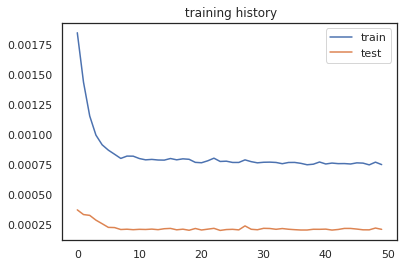

Train Score: 0.00068 MSE (0.03 RMSE)
Test Score: 0.00209 MSE (0.05 RMSE)


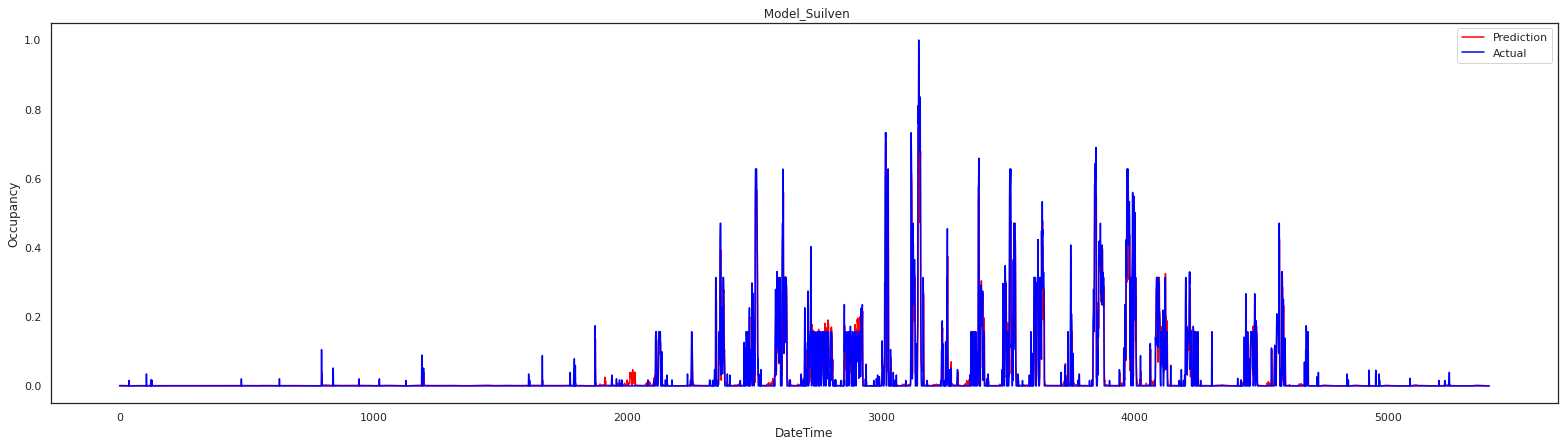

Suilven
Mean squared error: 000.00
Root Mean squared error: 000.05
Mean Absolute Error: 000.02 
R2 score: 000.77
03:35:13.19


In [86]:
start1 = time.time()
for key in keys:

  def normalize_data(df,col):
      scaler = MinMaxScaler()
      for co in col:
          df[co] = scaler.fit_transform(df[co].values.reshape(-1, 1))

      return df

    #Load the data
  def load_data(db, seq_len):
      amount_of_features = len(db.columns)
      data = db.to_numpy() #pd.DataFrame(db)
      sequence_length = seq_len + 1
      result = []
      for index in range(len(data) - sequence_length):
          result.append(data[index: index + sequence_length])

      result = np.array(result)
      row = round(0.8 * result.shape[0])
      train = result[:int(row), :]
      x_train = train[:, :-1]
      y_train = train[:, -1][:,-1]
      x_test = result[int(row):, :-1]
      y_test = result[int(row):, -1][:,-1]

      x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
      x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

      return [x_train, y_train, x_test, y_test]

  def build_model(layers):
          d = 0.3
          model = Sequential()

          model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
          model.add(Dropout(d))

          model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
          model.add(Dropout(d))

          model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
          model.add(Dense(1, kernel_initializer="uniform", activation='linear'))

          # adam = keras.optimizers.Adam(decay=0.2)

          start = time.time()
          model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
          # print("Compilation Time : ", time.time() - start)
          return model
  def model_score(model, X_train, y_train, X_test, y_test):
      trainScore = model.evaluate(X_train, y_train, verbose=0)
      print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], np.sqrt(trainScore[0])))

      testScore = model.evaluate(X_test, y_test, verbose=0)
      print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], np.sqrt(testScore[0])))
      return trainScore[0], testScore[0] 
  def metrics(y_test, predictions):
      # predictions = scaler.inverse_transform(predictions)
      # y_test = scaler.inverse_transform(y_test)

      R2 = r2_score(y_test, predictions, )
      MAE = mean_absolute_error(y_test, predictions)
      MSE = mean_squared_error(y_test, predictions)
      RMSE = np.sqrt(MSE)

      print(color.BLUE+color.UNDERLINE+color.BOLD+key+ color.END)
      print("Mean squared error: {:06.2f}".format(MSE))
      print("Root Mean squared error: {:06.2f}".format(RMSE))

      print("Mean Absolute Error: {:06.2f} ".format(MAE))
      print("R2 score: {:06.2f}".format(R2))
      print("===========================================")           

  print(key)
  dfnew=trainz[key]
  col=dfnew.columns
  ready = normalize_data(dfnew,col)
  window = 12
  X_train, y_train, X_test, y_test = load_data(dfnew[::-1], window)
  print("X_train", X_train.shape)
  print("y_train", y_train.shape)
  print("X_test", X_test.shape)
  print("y_test", y_test.shape)
  model = build_model([(len(col)), window, 1])
  start = time.time()
  history = model.fit(X_train, y_train, batch_size=512, epochs=50, validation_split=0.1, verbose=1)
  # print("Compilation Time : ", time.time() - start)
  end = time.time()
  hours, rem = divmod(end - start, 3600)
  minutes, seconds = divmod(rem, 60)
  print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))
  plt.title(' training history')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.savefig("LSTM Training_ "+str(key)+ "_History.png")
  plt.show()

  model_score(model, X_train, y_train, X_test, y_test)

  o1 = dfnew['Occupancy'].values.reshape(-1, 1)
  q1 = y_test.reshape(-1, 1)
  min_max_scaler = preprocessing.MinMaxScaler()
  a = min_max_scaler.fit_transform(o1)
  newy_test = min_max_scaler.inverse_transform(q1)

  p = model.predict(X_test)
  a = min_max_scaler.fit_transform(o1)
  q2 = p.reshape(-1, 1)
  newp = min_max_scaler.inverse_transform(q2)

  diff = []
  ratio = []
  final = pd.DataFrame(newy_test, columns=['Test'])
  for u in range(len(newy_test)):
      # pr = prediction day u
      pr = newp[u][0]
      # (y_test day u / pr) - 1
      ratio.append((newy_test[u] / pr) - 1)
      diff.append(abs(newy_test[u] - pr))
  final['Prediction'] = newp
  # check['Prediction'] = newp
  final['ratio'] = ratio
  final['diff'] = diff
  plt.figure(figsize=(27, 7))
  plt.title(' Model_'+str(key))
  plt.plot(newp, color='red', label='Prediction')
  plt.plot(newy_test, color='blue', label='Actual')
  plt.xlabel('DateTime')
  plt.ylabel('Occupancy')
  plt.legend(loc='best')
  plt.savefig("LSTM_"+str(key)+".png")
  plt.show()


  metrics(newy_test, newp)
end = time.time()
hours, rem = divmod(end - start1, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

## Addtional BI report from PowerBI
Site grouping and general space performance framework ideas
Personnel/Occupied space Performance framework ideas
Relationships to indoor performance and outdoor performance in temperature and humidity terms (Beirut/Lebanon is site location)

**p.s**

for Beirut Indoor/Outdoor anlysis. indoor thermal comfort calculation is based on ASHRAE Standard 55-217 using PMV method. as indoor data at a bulding level for Beirut was not available. Outdoor temperature and humidty data has been scraped for 10 years (2010-2020)

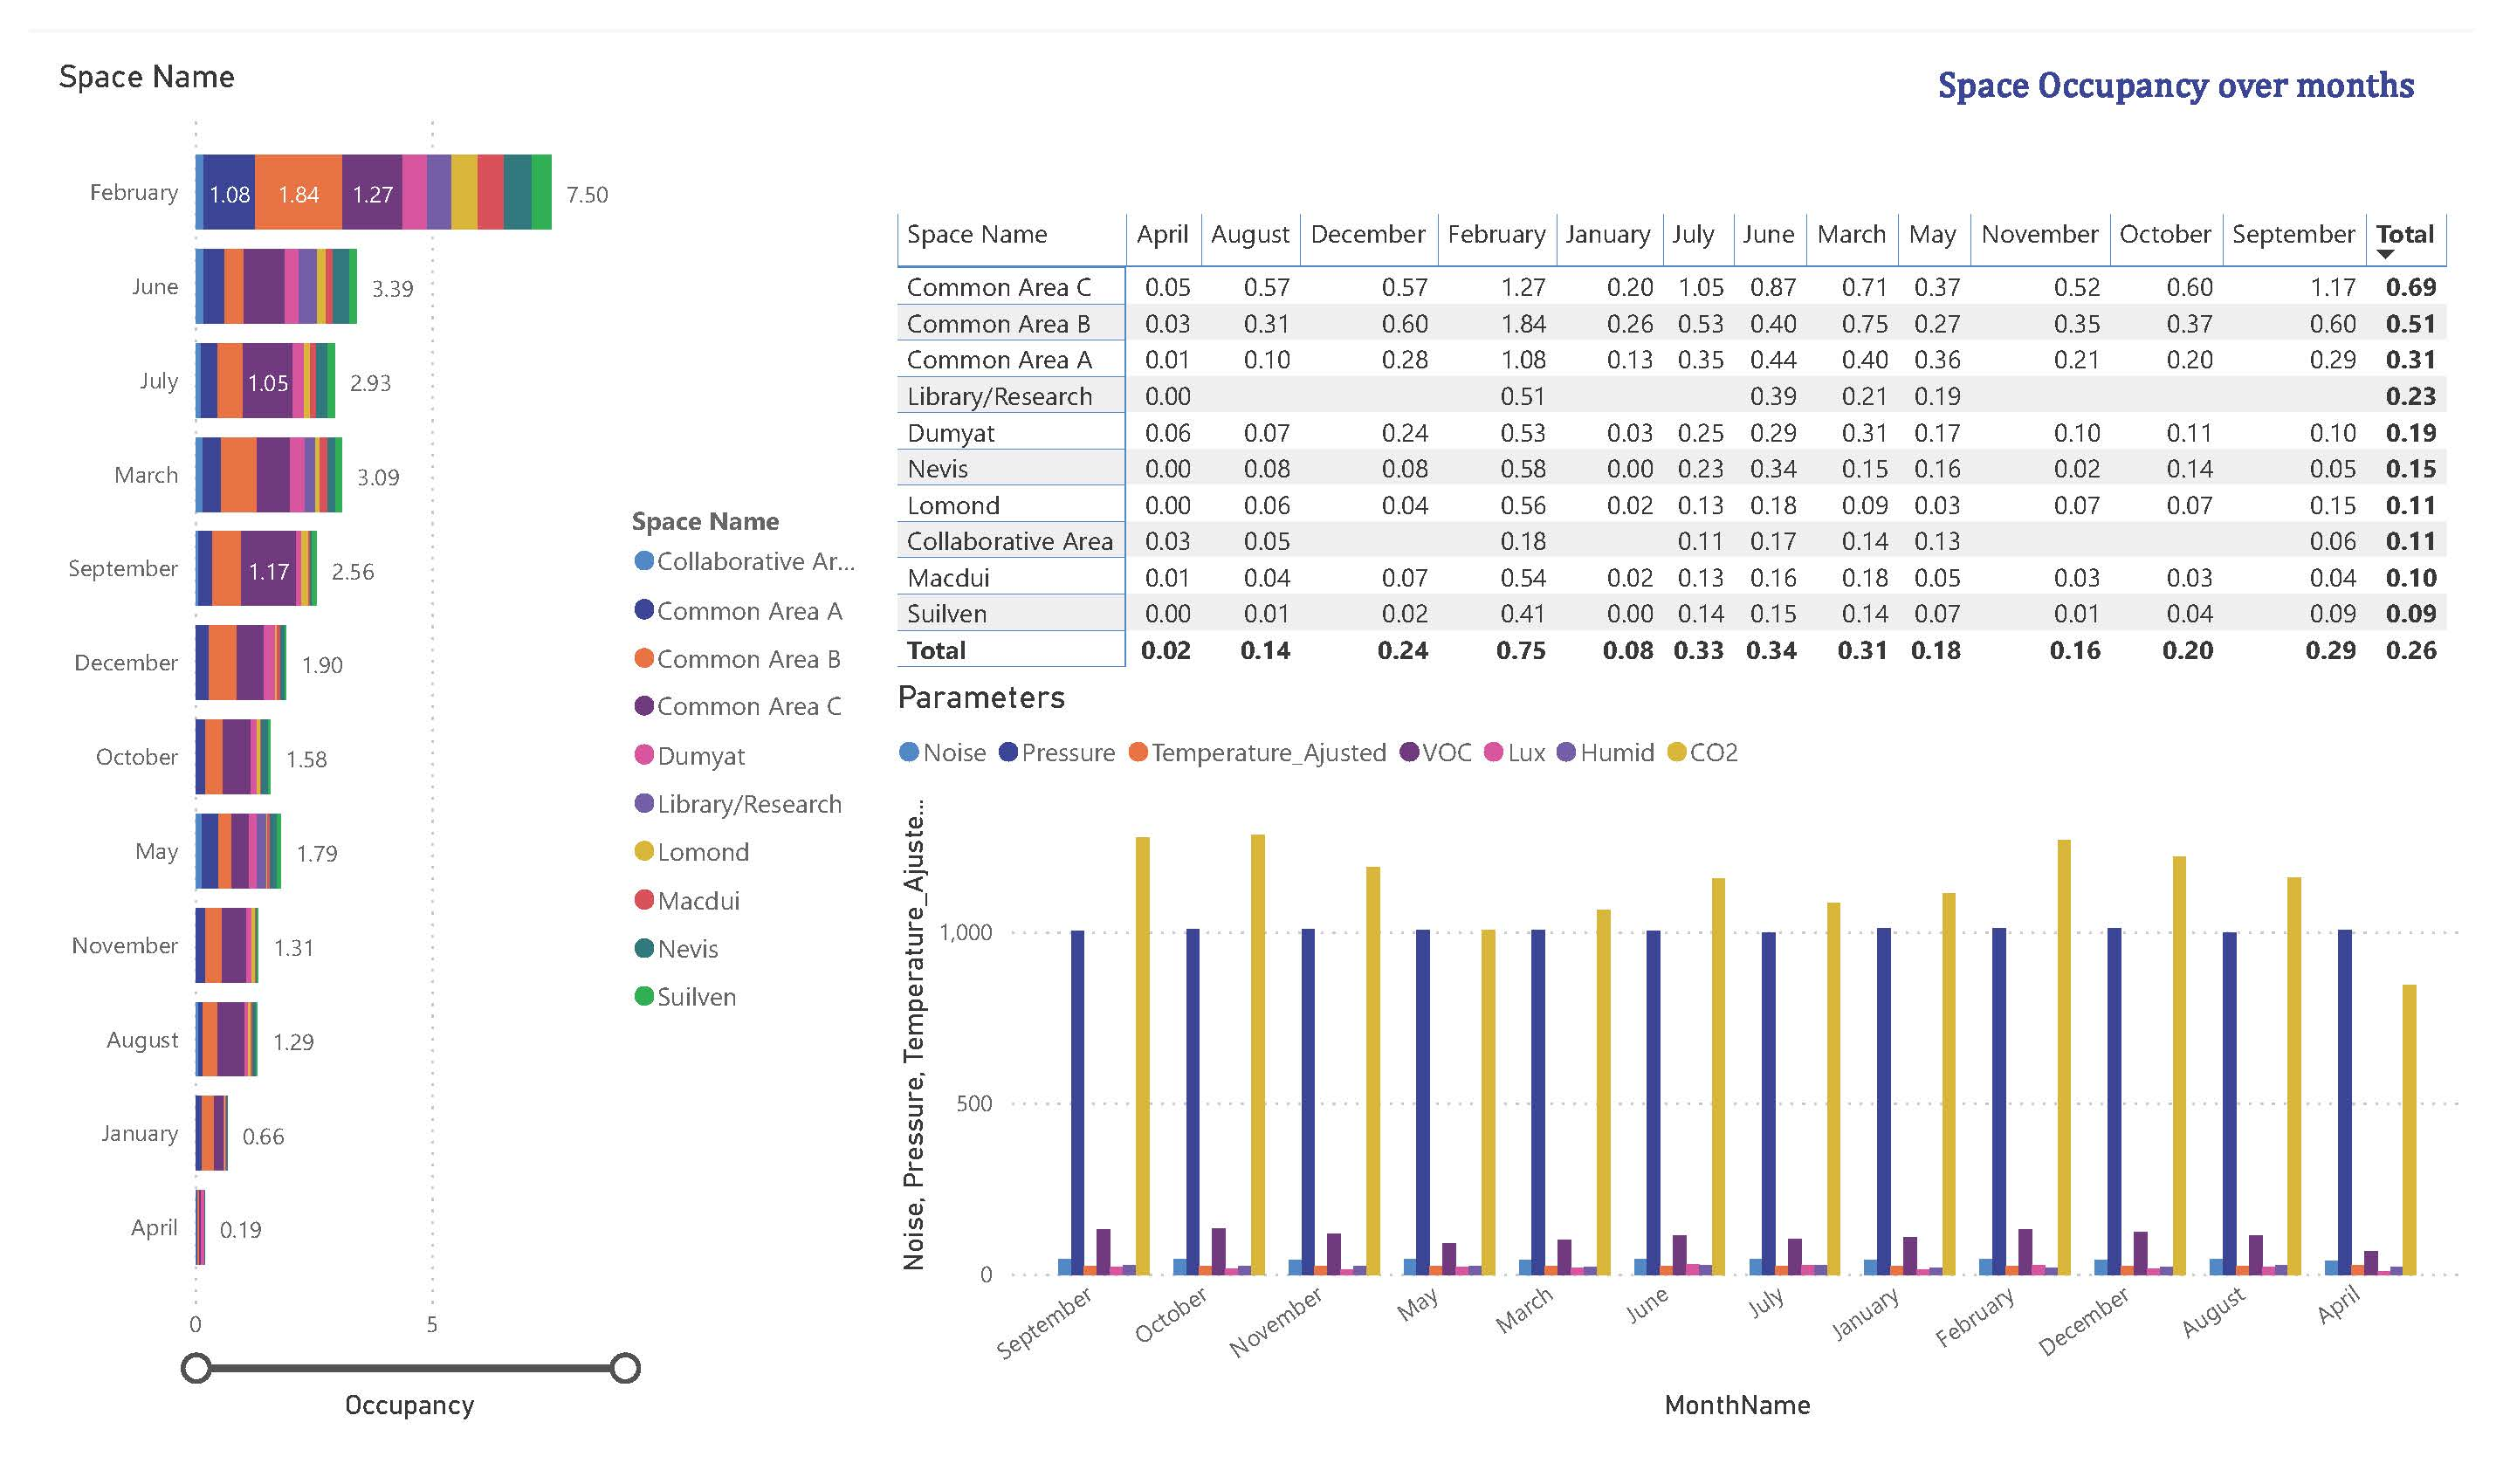

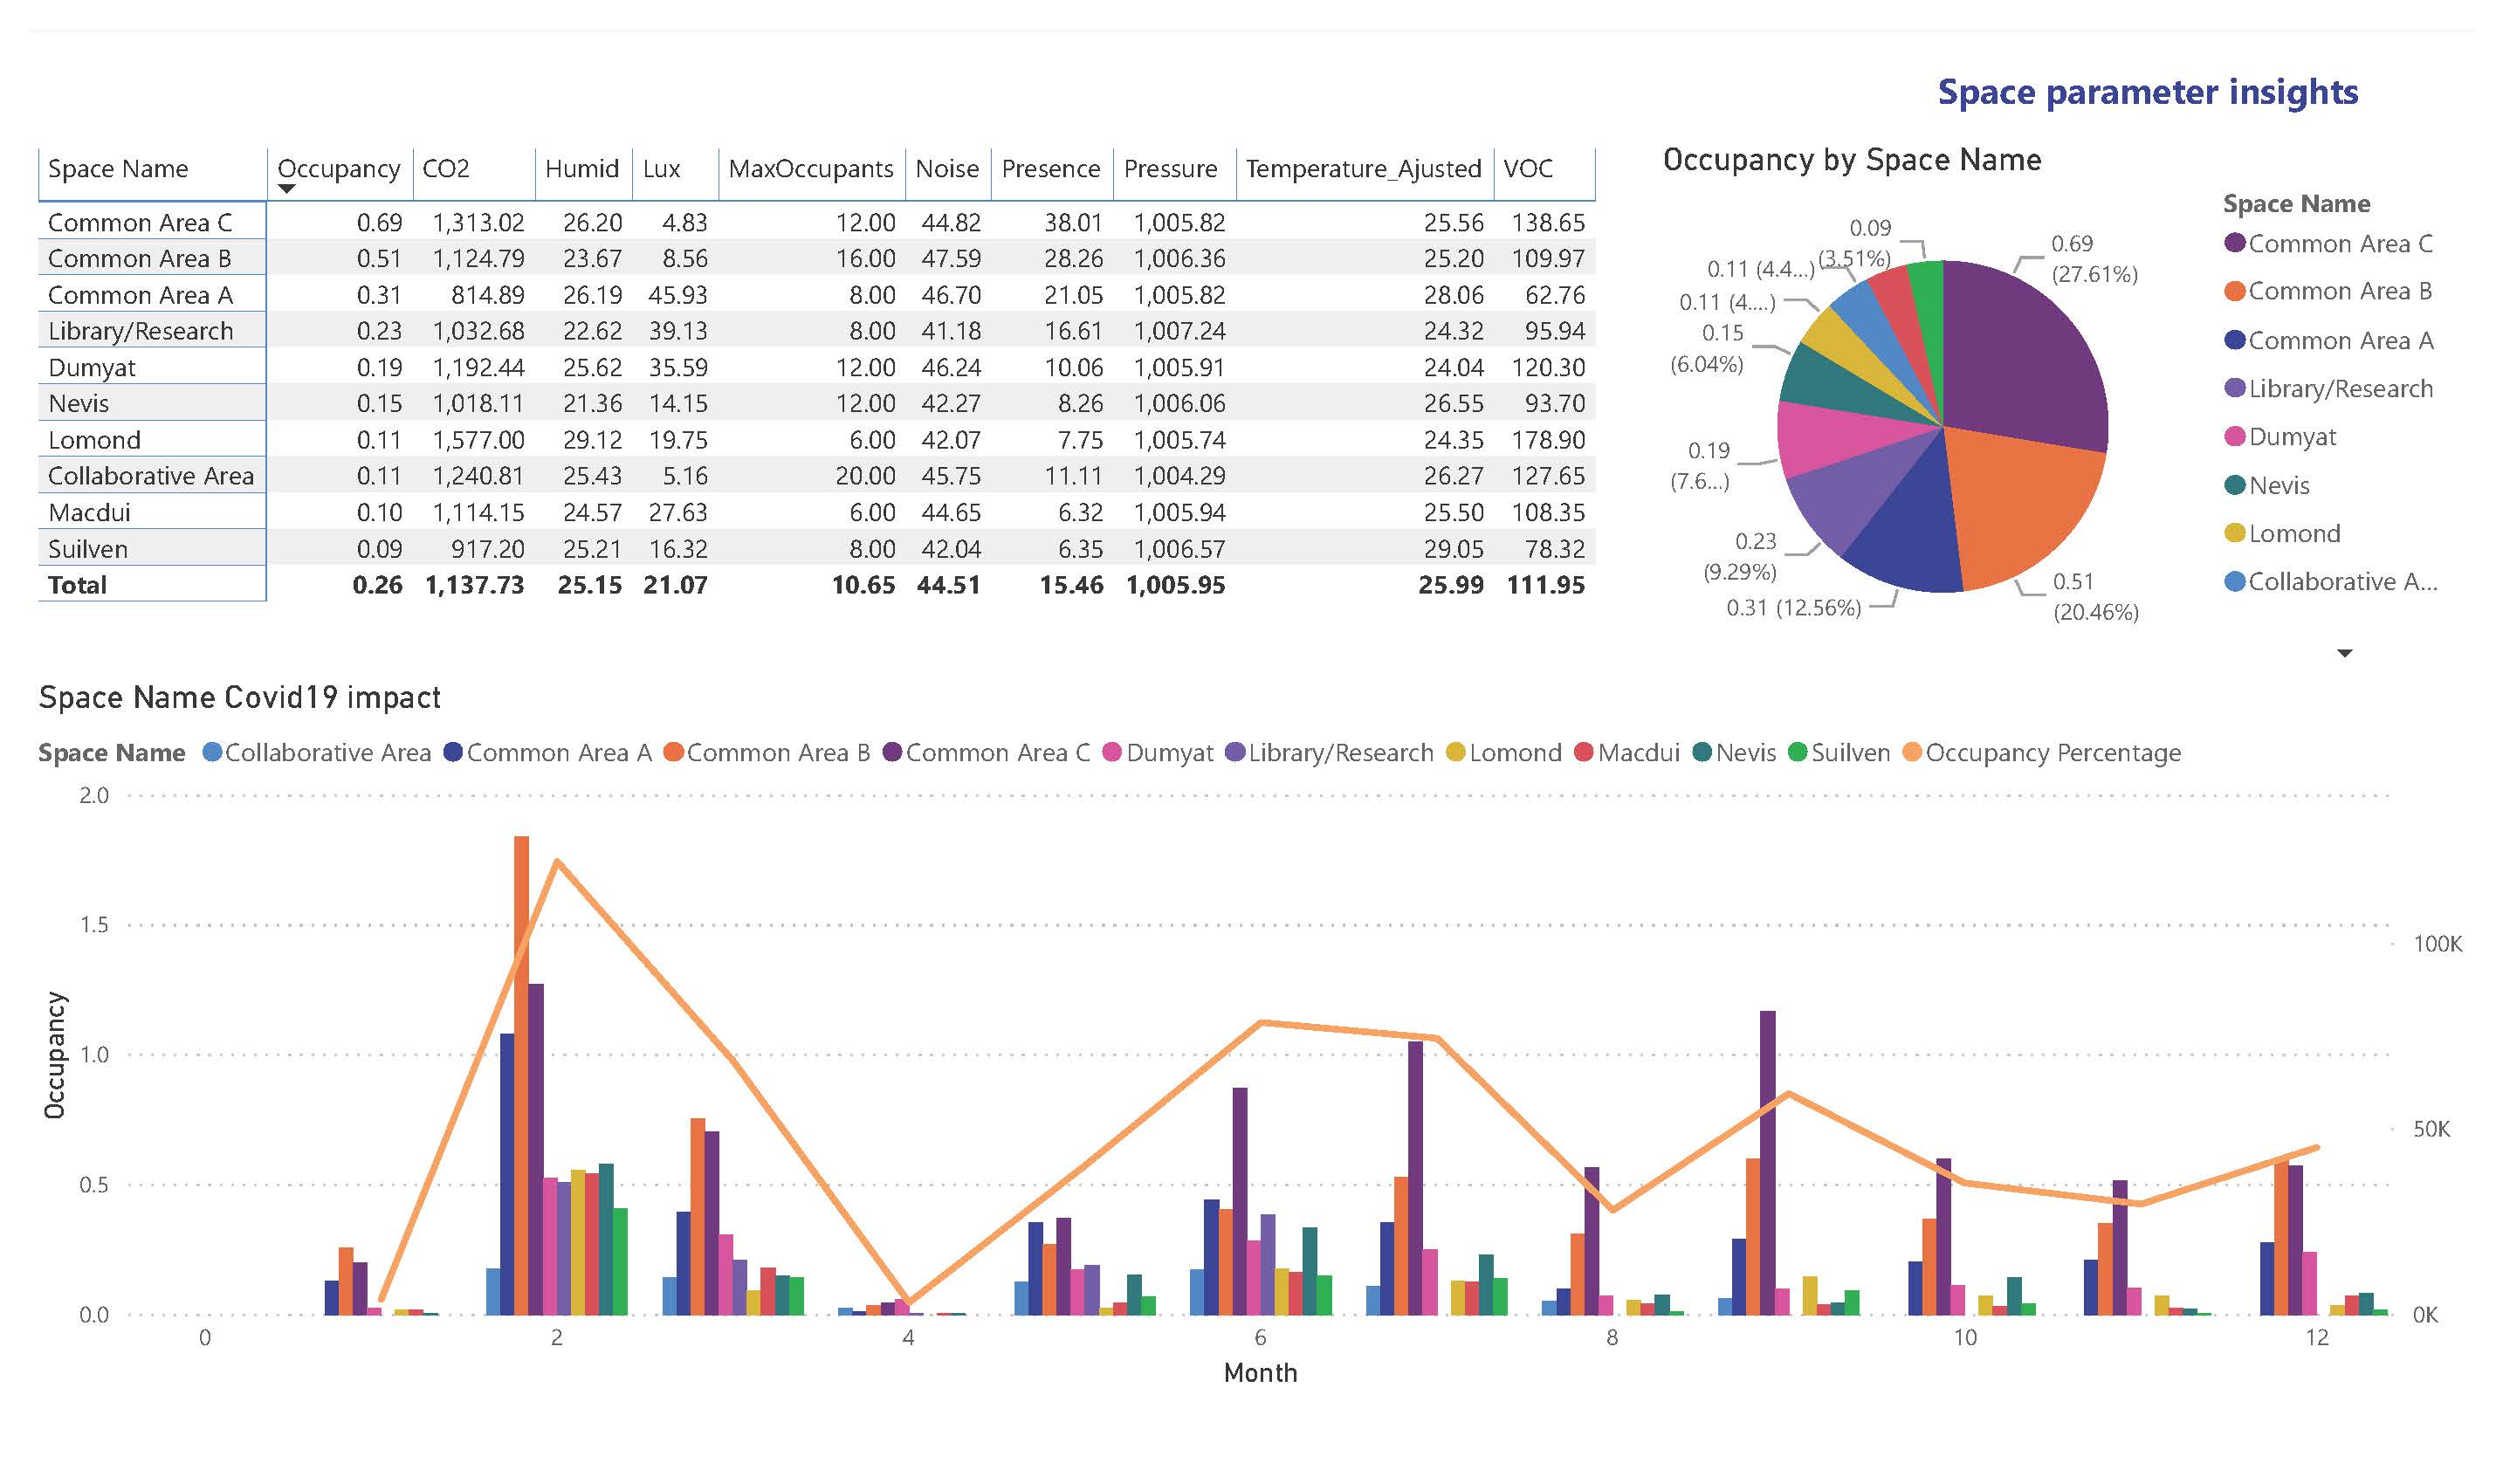

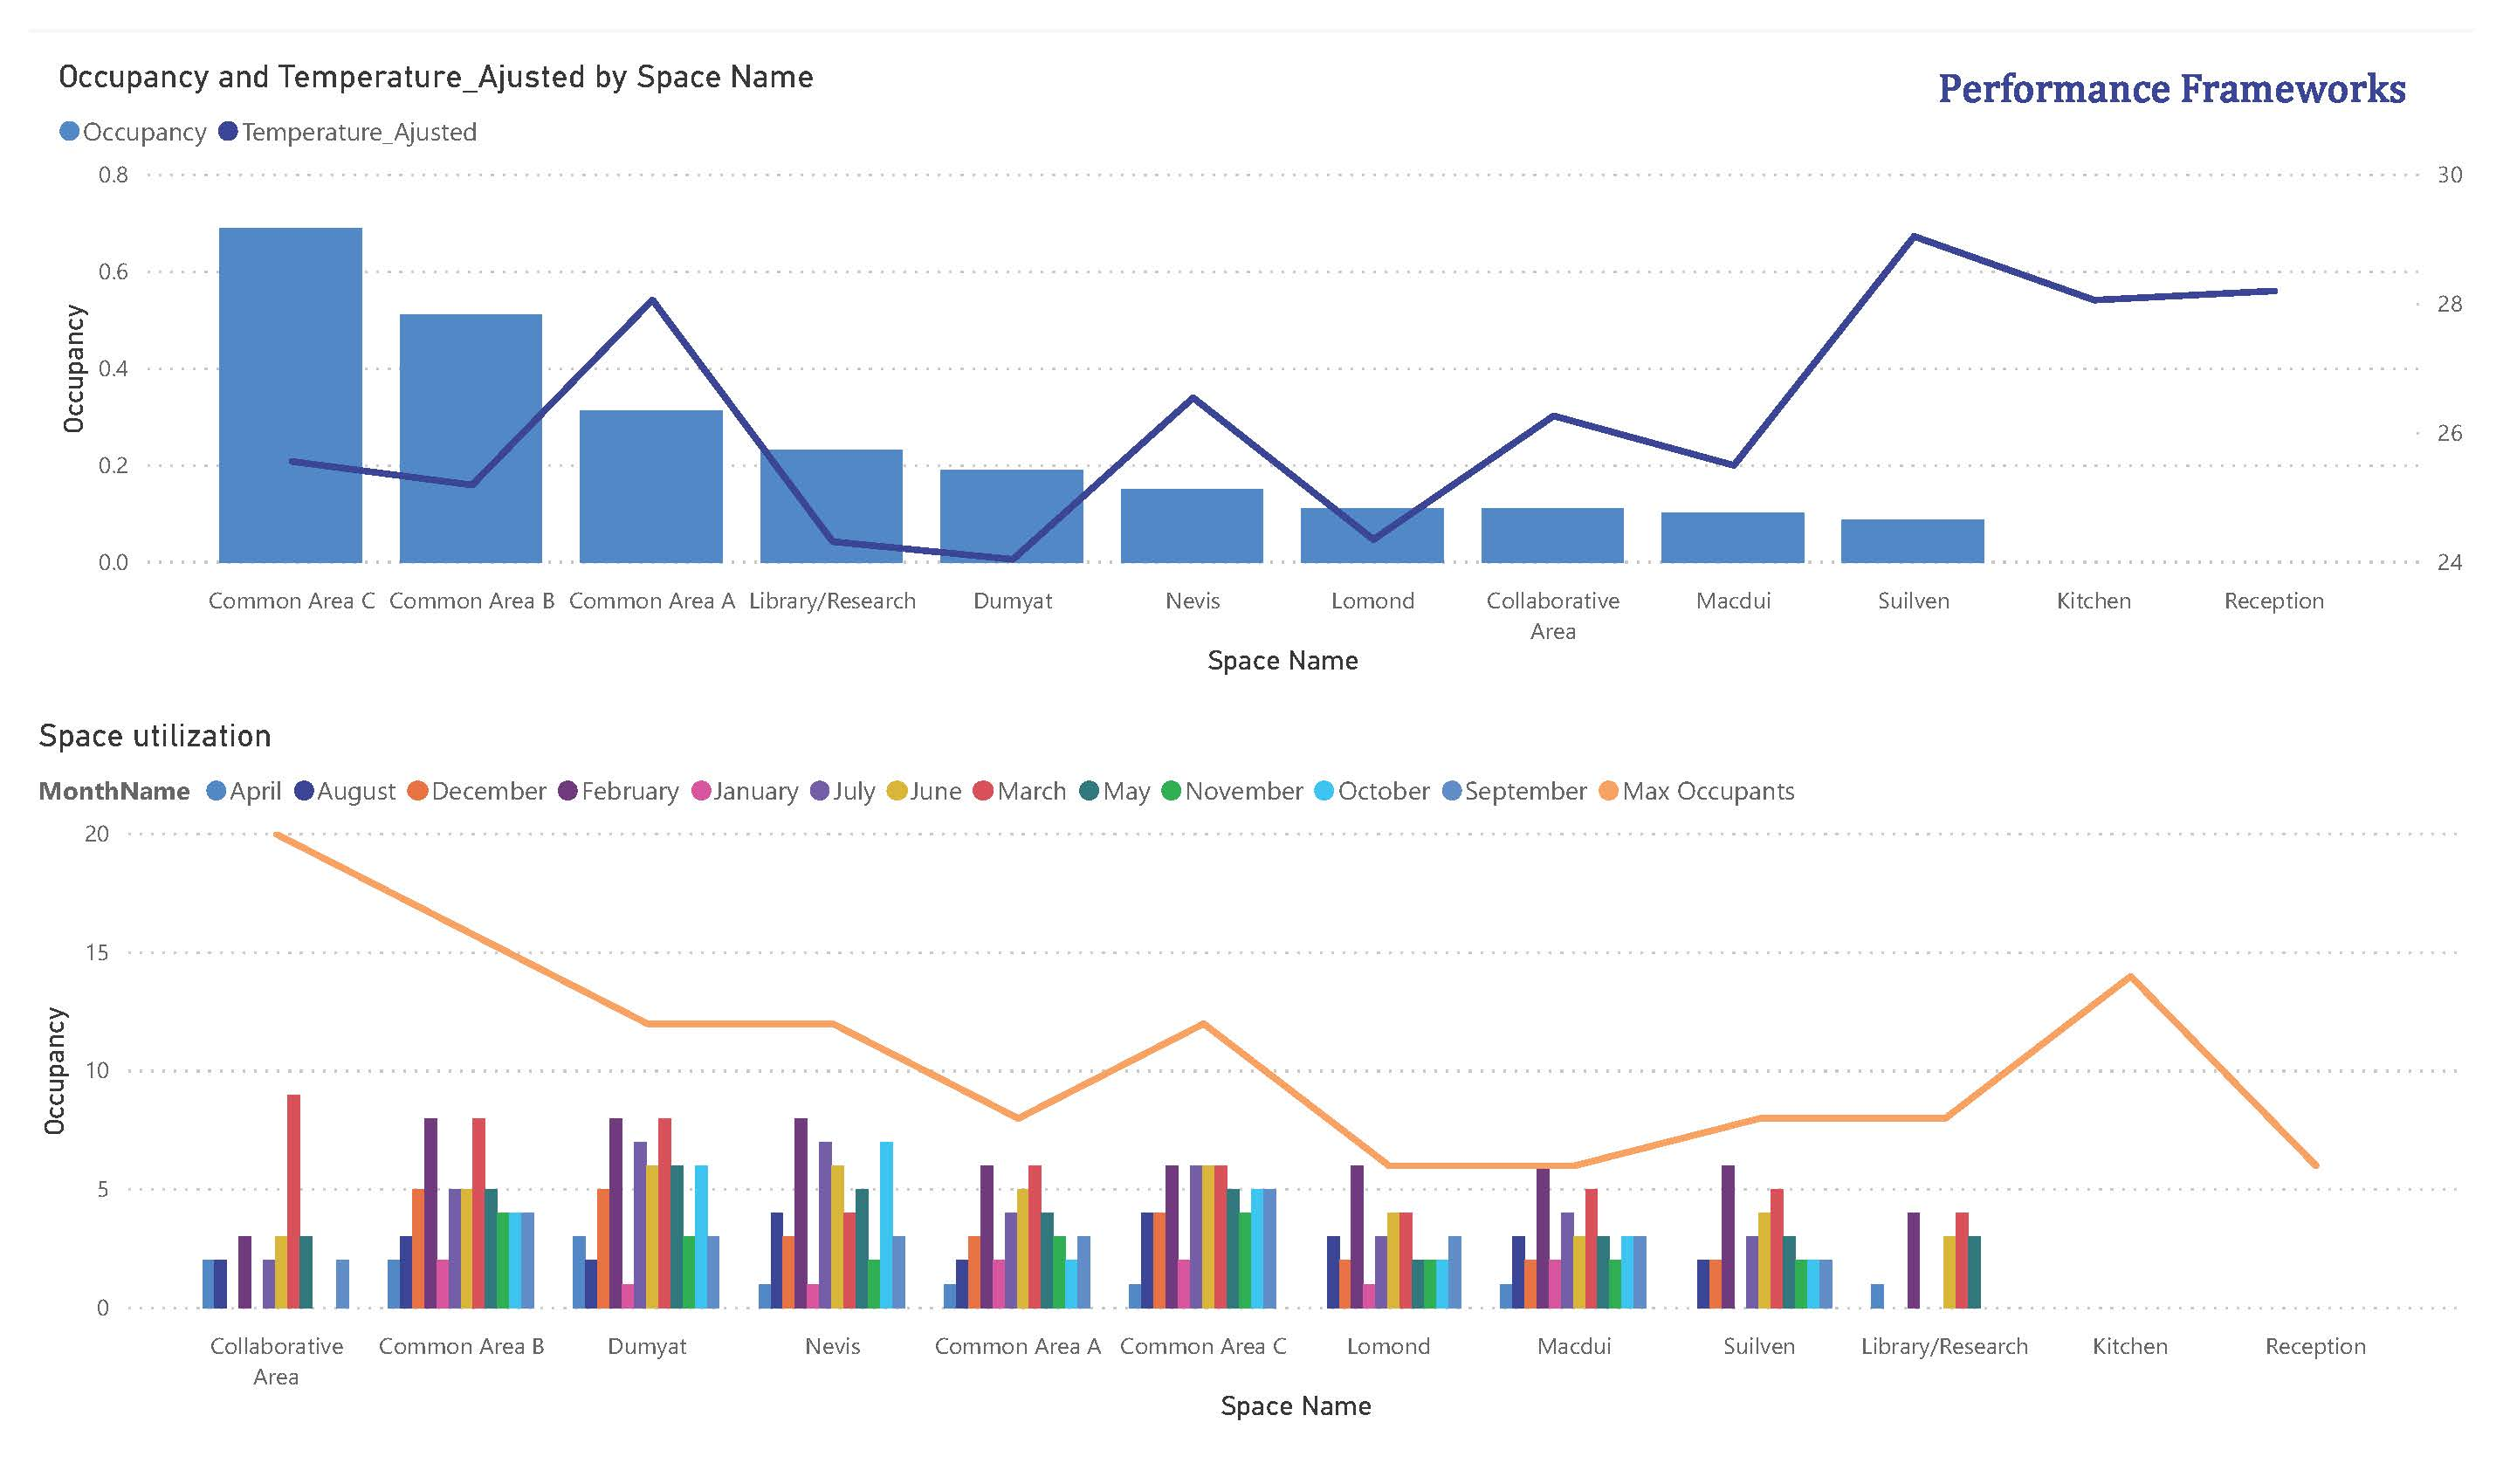

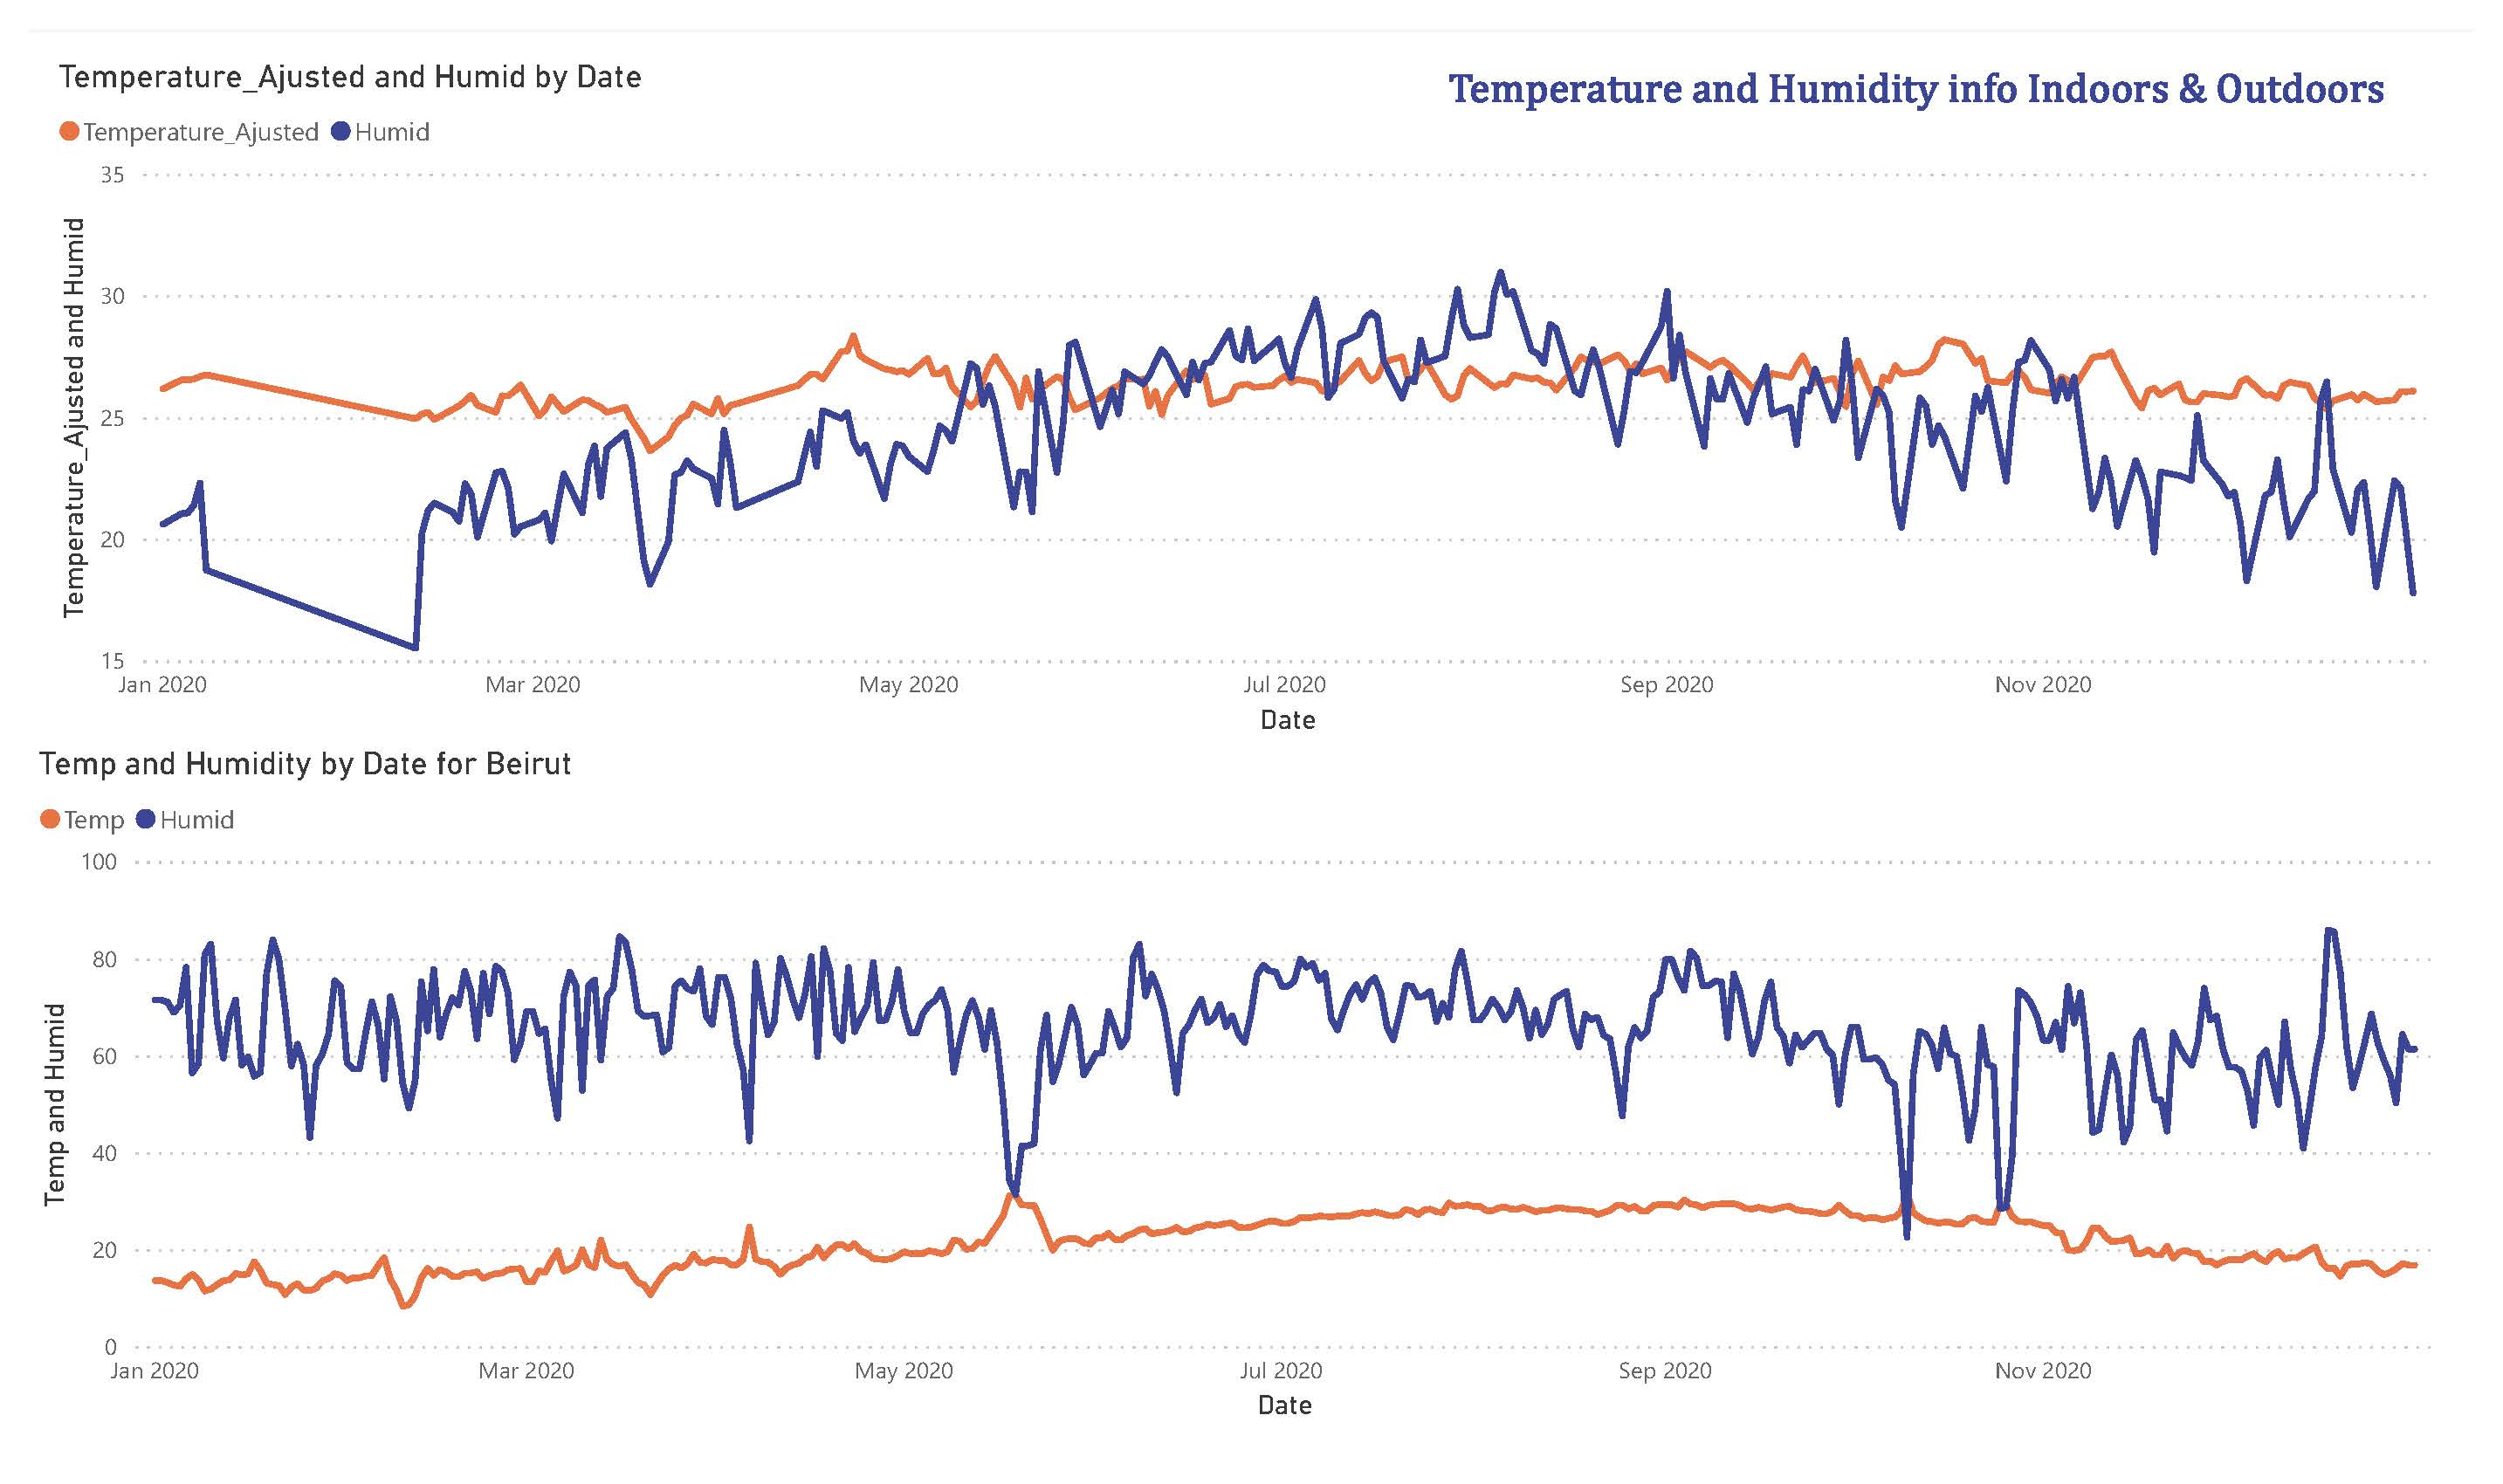

In [88]:
from IPython.display import Image
display(Image('Space_Page_1.jpg'))
display(Image('Space_Page_2.jpg'))
display(Image('Space_Page_3.jpg'))
display(Image('Space_Page_4.jpg'))

# print(Space_Page_1.jpg)